# GLOBO TAKE-HOME TEST
DAVID BARRERO GONZÁLEZ

**GOAL -> SIZE FLEET COURIERS FOR THE NEXT THREE WEEKS WITH ONE WEEK IN ADVANCE**

In [2]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')


<IPython.core.display.Javascript object>

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>



# Libraries and General Notebook Configurations

In [1]:
#Libraries and used modules

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
import pandas as pd
from pandas import DataFrame
pd.set_option('display.max_columns', None)
from pandas_profiling import ProfileReport
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno 
from matplotlib.pyplot import figure
from pandas.plotting import scatter_matrix
from scipy.stats import spearmanr
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegressionCV
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import  roc_auc_score
from sklearn.base import BaseEstimator, ClassifierMixin


In [3]:
#Colors Palette
colors = ['yellowgreen','gold', 'lightskyblue','lightcoral','orange' ]


# Load Raw Data for Courier Weekly Data + Life Time Data

- This notebooks compiles the analysis from merging both raw data provided after having cleaned and prepared " Courier Life Time Data". By combining every available information it will show an enriching picture from the business case. The final goal is to clean, analyse and prepare the model.

In [296]:
# Loading data from local folder
df_life_time_data_cleaned = pd.read_csv('/Users/dv/Desktop/Glovo Interview/take-home-assigment/CSV_InProgress/df_lifetime_data_cleaned.csv', 
                                        sep=',', low_memory=False,index_col=0)
df_weekly_data = pd.read_csv('/Users/dv/Desktop/Glovo Interview/take-home-assigment/Courier_weekly_data.csv', sep=',', low_memory=False)

In [297]:
df_life_time_data_cleaned.head()

courier feature_1  feature_2
0       208         a       25.0
24     2007         a       24.0
42     3767         b       33.0
82     6101         a       51.0
86     6282         a       35.0

In [298]:
df_weekly_data.head()

courier  week  feature_1  feature_2  feature_3  feature_4  feature_5  \
0     3767     2          6         34         38     0.0789     0.9211   
1     3767     4         -1         42         37     0.0000     1.0000   
2     3767     5         24         41         43     0.0233     0.9767   
3     3767     6        -22         65         66     0.0606     0.9394   
4     6282     2          9         33         27     0.0741     0.9259   

   feature_6  feature_7  feature_8  feature_9  feature_10  feature_11  \
0   140.4737     0.1316  2162.4737     0.7632    7.340776           8   
1   135.5946     0.0811  2097.4054     0.9459   11.883784          19   
2   131.0930     0.0233  2043.8837     0.9302    7.072100          16   
3   120.1515     0.0000  2124.2727     0.7727    7.356567          33   
4   100.0000     0.0370  4075.7407     0.8889    8.501233           5   

   feature_12  feature_13  feature_14  feature_15  feature_16  feature_17  
0   20.208158    5.236316      0.8158   43.384804           1          19  
1   18.855405    5.689459      0.8919   35.078042           3          11  
2   18.925116    5.138605      0.9302   31.455285           1          10  
3   18.259697    4.704394      0.7879   34.252991           1          30  
4   26.863704    4.828519      0.8889   46.478114           1           4

In [299]:
df_life_time_data_cleaned.shape

(6155, 3)

In [300]:
df_weekly_data.shape

(4117, 19)

## Create Dataset From Life Time Data and Weekly data


In [9]:
#Joining dataframe based on weekly data since it only makes sense to analyse couriers perfomance it weekly data is available
# Courier will be used as a key for the join
df_raw = pd.merge(
            df_life_time_data_cleaned.rename(columns = {'feature_1':'group', 'feature_2':'feature_0'}),
            df_weekly_data, 
            on='courier',
            how = 'right')

In [10]:
df_raw.shape

(4117, 21)

In [11]:
df_raw.head(10)

courier group  feature_0  week  feature_1  feature_2  feature_3  feature_4  \
0     3767     b       33.0     2          6         34         38     0.0789   
1     3767     b       33.0     4         -1         42         37     0.0000   
2     3767     b       33.0     5         24         41         43     0.0233   
3     3767     b       33.0     6        -22         65         66     0.0606   
4     6282     a       35.0     2          9         33         27     0.0741   
5     6282     a       35.0     3        -20         42         56     0.0536   
6     6282     a       35.0     4          9         22         32     0.1250   
7     6282     a       35.0     5         21         31         48     0.0417   
8     6282     a       35.0     6        -12         52         72     0.0694   
9     6282     a       35.0     7          1         40         56     0.0893   

   feature_5  feature_6  feature_7  feature_8  feature_9  feature_10  \
0     0.9211   140.4737     0.1316  2162.4737     0.7632    7.340776   
1     1.0000   135.5946     0.0811  2097.4054     0.9459   11.883784   
2     0.9767   131.0930     0.0233  2043.8837     0.9302    7.072100   
3     0.9394   120.1515     0.0000  2124.2727     0.7727    7.356567   
4     0.9259   100.0000     0.0370  4075.7407     0.8889    8.501233   
5     0.9464   113.4821     0.0357  4777.0714     0.9107    8.210125   
6     0.8750   105.0000     0.0938  5744.1875     0.8125    8.285422   
7     0.9583   117.2500     0.0833  4011.7708     0.9167    9.768052   
8     0.9306   107.6389     0.0417  4000.3333     0.8472    7.736114   
9     0.9107   124.3750     0.0893  3192.0000     0.9107    7.405355   

   feature_11  feature_12  feature_13  feature_14  feature_15  feature_16  \
0           8   20.208158    5.236316      0.8158   43.384804           1   
1          19   18.855405    5.689459      0.8919   35.078042           3   
2          16   18.925116    5.138605      0.9302   31.455285           1   
3          33   18.259697    4.704394      0.7879   34.252991           1   
4           5   26.863704    4.828519      0.8889   46.478114           1   
5          16   23.651786    5.553571      0.9107   79.407407           2   
6          12   18.180937    5.834375      0.7813   87.250000           1   
7          17   20.346667    5.615417      0.9167   85.083333           2   
8          17   21.941111    5.093056      0.8750   73.904915           1   
9          11   18.591071    5.353214      0.9107   65.618750           2   

   feature_17  
0          19  
1          11  
2          10  
3          30  
4           4  
5           5  
6           2  
7           9  
8          13  
9           4

In [12]:
df_raw.describe()

courier    feature_0         week    feature_1    feature_2  \
count    4117.000000  3511.000000  4117.000000  4117.000000  4117.000000   
mean   366530.934418    33.032754     4.910857    -3.702453    44.232208   
std    128603.611959     9.226452     3.364852    17.407331    24.007116   
min      3767.000000     1.000000     0.000000  -138.000000     1.000000   
25%    280239.000000    26.000000     2.000000   -12.000000    26.000000   
50%    406936.000000    32.000000     5.000000    -2.000000    41.000000   
75%    467727.000000    38.500000     8.000000     6.000000    59.000000   
max    519341.000000    66.000000    11.000000    77.000000   169.000000   

         feature_3    feature_4    feature_5    feature_6    feature_7  \
count  4117.000000  4117.000000  4117.000000  4117.000000  4117.000000   
mean     55.691037     0.068610     0.931390   104.331502     0.059339   
std      31.666550     0.068999     0.068999     8.473348     0.064646   
min       1.000000     0.000000     0.000000    92.857100     0.000000   
25%      31.000000     0.018500     0.901200   100.000000     0.000000   
50%      51.000000     0.054100     0.945900   100.465100     0.043500   
75%      76.000000     0.098800     0.981500   104.766000     0.088200   
max     189.000000     1.000000     1.000000   197.739100     0.666700   

          feature_8    feature_9   feature_10   feature_11   feature_12  \
count   4117.000000  4117.000000  4117.000000  4117.000000  4117.000000   
mean    3975.807328     0.767527     9.619359    20.266942    20.000994   
std     1237.055134     0.136458     1.827863    12.460020     3.205479   
min     1136.750000     0.000000     2.575000     0.000000     5.416667   
25%     2750.977800     0.693700     8.424751    11.000000    18.168824   
50%     4099.425000     0.785700     9.497961    19.000000    19.648810   
75%     4774.028200     0.864200    10.607692    28.000000    21.335395   
max    12593.900000     1.000000    20.546667    86.000000    66.400000   

        feature_13   feature_14   feature_15   feature_16  feature_17  
count  4117.000000  4117.000000  4117.000000  4117.000000  4117.00000  
mean      5.211435     0.782381    68.655642     2.255526    12.78941  
std       0.961980     0.164578    18.828885     1.542969    11.69108  
min       3.270000     0.000000     2.957809     1.000000     1.00000  
25%       4.570099     0.739100    57.839947     1.000000     5.00000  
50%       5.072500     0.822200    71.653595     2.000000    10.00000  
75%       5.618522     0.883700    82.180556     3.000000    17.00000  
max      12.546923     1.000000   180.861111    13.000000   195.00000

# Exploratory Analysis and Data Munging

## Define / Create Target Variable

- For each courier, if data for weeks 9, 10 and 11 (the churn window) are not provided, it means that the courier did not work on those weeks, so label them as “1” (​churned)​ ; if the courier worked in any of those weeks, label them as “0” (​not churned)​ .

In [13]:
df_raw.week.unique()

array([ 2,  4,  5,  6,  3,  7,  9, 10, 11,  0,  1,  8])

In [14]:
# Total of active couriers
df_raw.courier.nunique()

759

In [15]:
# Create dataframe (df) with couriers that have not churned
df_raw_not_churned = df_raw.copy()
df_raw_not_churned = df_raw_not_churned.sort_values(by='courier')
df_raw_not_churned = df_raw_not_churned[df_raw_not_churned.week > 8]

In [16]:
df_raw_not_churned.head(10)

courier group  feature_0  week  feature_1  feature_2  feature_3  \
10       6282     a       35.0     9          5         34         40   
11       6282     a       35.0    10          1         39         47   
12       6282     a       35.0    11         10         40         41   
18      13096     a       35.0     9         26         54         80   
19      13096     a       35.0    10         21         80         71   
20      13096     a       35.0    11        -25        101         71   
3515    19450   NaN        NaN     9          1        108         28   
3516    19450   NaN        NaN    10         -9        109         28   
40      39517     a       35.0     9          9         81        109   
41      39517     a       35.0    10        -70         90        115   

      feature_4  feature_5  feature_6  feature_7  feature_8  feature_9  \
10       0.0250     0.9750   100.0000     0.0000  4124.5250     0.9250   
11       0.0638     0.9362   103.8298     0.0638  4378.7021     0.9149   
12       0.0000     1.0000   100.0000     0.0488  4432.4146     0.9756   
18       0.0750     0.9250   105.2250     0.0250  3866.3375     0.8750   
19       0.0282     0.9718   111.4930     0.0704  4339.7887     0.8873   
20       0.0282     0.9718   108.2394     0.0141  3775.1127     0.9155   
3515     0.0357     0.9643   117.7857     0.1071  4891.6429     0.9286   
3516     0.0714     0.9286   156.9286     0.1071  4675.8214     0.7857   
40       0.0367     0.9633   100.8440     0.0642  4327.7064     0.8991   
41       0.0174     0.9826   113.3130     0.0783  2906.5304     0.9565   

      feature_10  feature_11  feature_12  feature_13  feature_14  feature_15  \
10      7.535005          10   21.523250    4.685000      0.9250   67.201797   
11      6.772336          10   19.023404    5.033191      0.8936   61.633191   
12      8.825612          12   18.789024    4.694878      0.9512   60.953472   
18      9.412291          24   20.007375    5.083250      0.8625   76.819444   
19      9.108214          40   20.889014    5.196901      0.8732   47.096181   
20      8.464786          34   21.518451    4.939155      0.8592   33.767052   
3515   10.633336          16   22.111429    6.710714      0.8929   20.103652   
3516   16.016668          27   32.965000    9.016429      0.7500   27.783639   
40      8.480582          38   18.733761    4.795505      0.8899   63.414952   
41      9.366957          58   20.612435    4.490087      0.9652   52.980247   

      feature_16  feature_17  
10             2           3  
11             1           6  
12             3           9  
18             2          12  
19             1           9  
20             2           8  
3515           1           7  
3516           1           9  
40             4          15  
41             8          16

In [17]:
df_raw_not_churned.week.unique()

array([ 9, 10, 11])

In [18]:
#Number of couriers that did not churn
df_raw_not_churned.courier.nunique()

387

- From 759 couriers, 387 (50%) of them have some activity during any of 9, 10, 11 week

In [19]:
#Identification of couriers that not churned
df_raw_not_churned.courier.unique()

array([  6282,  13096,  19450,  39517,  39519,  41143,  41486,  41488,
        43746,  50907,  57982,  68469,  69348,  86596,  87117,  87766,
       101552, 103832, 107223, 107556, 107949, 119103, 121755, 121827,
       125035, 132223, 132228, 132938, 134686, 143065, 143227, 146869,
       147622, 152715, 153347, 153466, 157239, 157665, 161137, 161138,
       166282, 167090, 167688, 167878, 167887, 167889, 170608, 172699,
       173544, 179762, 180124, 180131, 181631, 194173, 194285, 195273,
       195329, 195536, 195645, 201653, 205683, 218231, 230688, 230690,
       231495, 231505, 240403, 242453, 242566, 243356, 252728, 259291,
       259996, 261433, 261435, 261436, 261444, 265299, 266744, 266749,
       266752, 266776, 267539, 274368, 274371, 275637, 275649, 275654,
       275760, 275859, 275861, 275894, 275902, 279679, 279715, 279728,
       279736, 279743, 279776, 279784, 280239, 280814, 281394, 281494,
       285175, 285187, 286271, 294910, 294912, 296692, 296764, 296766,
      

In [20]:
# Create target variable 
def create_target(row):
    if row.courier in df_raw_not_churned.courier.unique():
        return 0
    else:
        return 1  

df_with_target = df_raw.copy()   
df_with_target['churn'] = df_with_target.apply(create_target, axis = 1)


In [21]:
df_with_target.head(30)

courier group  feature_0  week  feature_1  feature_2  feature_3  \
0      3767     b       33.0     2          6         34         38   
1      3767     b       33.0     4         -1         42         37   
2      3767     b       33.0     5         24         41         43   
3      3767     b       33.0     6        -22         65         66   
4      6282     a       35.0     2          9         33         27   
5      6282     a       35.0     3        -20         42         56   
6      6282     a       35.0     4          9         22         32   
7      6282     a       35.0     5         21         31         48   
8      6282     a       35.0     6        -12         52         72   
9      6282     a       35.0     7          1         40         56   
10     6282     a       35.0     9          5         34         40   
11     6282     a       35.0    10          1         39         47   
12     6282     a       35.0    11         10         40         41   
13    10622     b       35.0     0          5         82         45   
14    10622     b       35.0     1        -12         87         63   
15    13096     a       35.0     5        -10         64         95   
16    13096     a       35.0     6         10         54         84   
17    13096     a       35.0     8          1         53         74   
18    13096     a       35.0     9         26         54         80   
19    13096     a       35.0    10         21         80         71   
20    13096     a       35.0    11        -25        101         71   
21    14261     a       44.0     0          4         79         59   
22    14261     a       44.0     1        -16         83         72   
23    14261     a       44.0     2          2         67         53   
24    14261     a       44.0     3          3         69         76   
25    14261     a       44.0     4          7         72         88   
26    14261     a       44.0     5         -1         79         77   
27    14261     a       44.0     6         -1         78         71   
28    14261     a       44.0     7        -27         77         71   
29    18920     a       26.0     0         44         99         35   

    feature_4  feature_5  feature_6  feature_7  feature_8  feature_9  \
0      0.0789     0.9211   140.4737     0.1316  2162.4737     0.7632   
1      0.0000     1.0000   135.5946     0.0811  2097.4054     0.9459   
2      0.0233     0.9767   131.0930     0.0233  2043.8837     0.9302   
3      0.0606     0.9394   120.1515     0.0000  2124.2727     0.7727   
4      0.0741     0.9259   100.0000     0.0370  4075.7407     0.8889   
5      0.0536     0.9464   113.4821     0.0357  4777.0714     0.9107   
6      0.1250     0.8750   105.0000     0.0938  5744.1875     0.8125   
7      0.0417     0.9583   117.2500     0.0833  4011.7708     0.9167   
8      0.0694     0.9306   107.6389     0.0417  4000.3333     0.8472   
9      0.0893     0.9107   124.3750     0.0893  3192.0000     0.9107   
10     0.0250     0.9750   100.0000     0.0000  4124.5250     0.9250   
11     0.0638     0.9362   103.8298     0.0638  4378.7021     0.9149   
12     0.0000     1.0000   100.0000     0.0488  4432.4146     0.9756   
13     0.1111     0.8889   100.0000     0.0889  2476.2889     0.5333   
14     0.1270     0.8730   100.3175     0.0635  2677.4921     0.7143   
15     0.1684     0.8316   108.1158     0.0737  4656.7053     0.7053   
16     0.1548     0.8452   100.4762     0.0119  4523.8452     0.6667   
17     0.0541     0.9459   106.3108     0.0270  3612.4730     0.8784   
18     0.0750     0.9250   105.2250     0.0250  3866.3375     0.8750   
19     0.0282     0.9718   111.4930     0.0704  4339.7887     0.8873   
20     0.0282     0.9718   108.2394     0.0141  3775.1127     0.9155   
21     0.0339     0.9661   123.5763     0.1695  3788.9831     0.8136   
22     0.0139     0.9861   112.6528     0.1111  3706.1944     0.9167   
23     0.0377     0.9623   100.0000     0.1509  4125.6415     0.8868   
24

In [22]:
df_with_target.shape

(4117, 22)

- Altough churn is the target variable, it has been created "Active" to gain insights on what characteristics have Active riders


In [23]:
#drop rows for weeks 8,9, 10 and 11 to avoid bias and because the prediction needs to be done a week before
df_working = df_with_target.copy()
df_working = df_working[(df_working.week < 8)]

In [24]:
print('The working dataframe has ' + (str(df_working.shape[0])) + ' rows x ' + (str(df_working.shape[1])) + ' columns')

The working dataframe has 3025 rows x 22 columns


In [25]:
df_working.describe()

courier    feature_0         week    feature_1    feature_2  \
count    3025.000000  2571.000000  3025.000000  3025.000000  3025.000000   
mean   368198.358347    32.971606     3.292231    -2.893223    43.383140   
std    127993.952842     9.138385     2.252106    16.372872    23.770959   
min      3767.000000     1.000000     0.000000  -138.000000     1.000000   
25%    281494.000000    26.000000     1.000000   -11.000000    26.000000   
50%    406948.000000    32.000000     3.000000    -2.000000    40.000000   
75%    467864.000000    38.500000     5.000000     6.000000    57.000000   
max    519341.000000    66.000000     7.000000    77.000000   169.000000   

         feature_3    feature_4    feature_5    feature_6    feature_7  \
count  3025.000000  3025.000000  3025.000000  3025.000000  3025.000000   
mean     54.476033     0.076942     0.923059   104.688290     0.065939   
std      30.592909     0.072091     0.072091     8.809467     0.065232   
min       1.000000     0.000000     0.000000    92.857100     0.000000   
25%      31.000000     0.026700     0.888900   100.000000     0.014700   
50%      51.000000     0.062500     0.937500   100.750000     0.051700   
75%      74.000000     0.111100     0.973300   105.400000     0.098200   
max     184.000000     1.000000     1.000000   197.739100     0.666700   

          feature_8    feature_9   feature_10   feature_11   feature_12  \
count   3025.000000  3025.000000  3025.000000  3025.000000  3025.000000   
mean    4070.988724     0.748000     9.796565    20.252893    20.032864   
std     1298.174332     0.138595     1.851199    12.224470     3.276434   
min     1445.666700     0.000000     2.575000     0.000000     7.140000   
25%     2761.015900     0.670100     8.601107    11.000000    18.145942   
50%     4167.511100     0.763200     9.703900    19.000000    19.662683   
75%     4941.105300     0.846200    10.805563    27.000000    21.400312   
max    12593.900000     1.000000    20.546667    82.000000    66.400000   

        feature_13   feature_14   feature_15   feature_16   feature_17  \
count  3025.000000  3025.000000  3025.000000  3025.000000  3025.000000   
mean      5.293364     0.764485    70.344298     2.207273    13.469752   
std       0.981991     0.168306    18.660267     1.487941    12.423356   
min       3.507143     0.000000     2.957809     1.000000     1.000000   
25%       4.607222     0.722200    59.786836     1.000000     5.000000   
50%       5.169545     0.802000    73.398889     2.000000    11.000000   
75%       5.728191     0.867600    83.759259     3.000000    17.000000   
max      10.917143     1.000000   180.861111    13.000000   195.000000   

             churn  
count  3025.000000  
mean      0.349091  
std       0.476762  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

In [451]:
df_working.head(10)

courier group  feature_0  week  feature_1  feature_2  feature_3  feature_4  \
0     3767     b       33.0     2          6         34         38     0.0789   
1     3767     b       33.0     4         -1         42         37     0.0000   
2     3767     b       33.0     5         24         41         43     0.0233   
3     3767     b       33.0     6        -22         65         66     0.0606   
4     6282     a       35.0     2          9         33         27     0.0741   
5     6282     a       35.0     3        -20         42         56     0.0536   
6     6282     a       35.0     4          9         22         32     0.1250   
7     6282     a       35.0     5         21         31         48     0.0417   
8     6282     a       35.0     6        -12         52         72     0.0694   
9     6282     a       35.0     7          1         40         56     0.0893   

   feature_5  feature_6  feature_7  feature_8  feature_9  feature_10  \
0     0.9211   140.4737     0.1316  2162.4737     0.7632    7.340776   
1     1.0000   135.5946     0.0811  2097.4054     0.9459   11.883784   
2     0.9767   131.0930     0.0233  2043.8837     0.9302    7.072100   
3     0.9394   120.1515     0.0000  2124.2727     0.7727    7.356567   
4     0.9259   100.0000     0.0370  4075.7407     0.8889    8.501233   
5     0.9464   113.4821     0.0357  4777.0714     0.9107    8.210125   
6     0.8750   105.0000     0.0938  5744.1875     0.8125    8.285422   
7     0.9583   117.2500     0.0833  4011.7708     0.9167    9.768052   
8     0.9306   107.6389     0.0417  4000.3333     0.8472    7.736114   
9     0.9107   124.3750     0.0893  3192.0000     0.9107    7.405355   

   feature_11  feature_12  feature_13  feature_14  feature_15  feature_16  \
0           8   20.208158    5.236316      0.8158   43.384804           1   
1          19   18.855405    5.689459      0.8919   35.078042           3   
2          16   18.925116    5.138605      0.9302   31.455285           1   
3          33   18.259697    4.704394      0.7879   34.252991           1   
4           5   26.863704    4.828519      0.8889   46.478114           1   
5          16   23.651786    5.553571      0.9107   79.407407           2   
6          12   18.180937    5.834375      0.7813   87.250000           1   
7          17   20.346667    5.615417      0.9167   85.083333           2   
8          17   21.941111    5.093056      0.8750   73.904915           1   
9          11   18.591071    5.353214      0.9107   65.618750           2   

   feature_17  churn  
0          19      1  
1          11      1  
2          10      1  
3          30      1  
4           4      0  
5           5      0  
6           2      0  
7           9      0  
8          13      0  
9           4      0

In [27]:
#checking week values
df_working.week.unique()

array([2, 4, 5, 6, 3, 7, 0, 1])

## Data Cleaning

- This section contains several techniques and strategies to prepare the data for building the model

### Dealing null values

<AxesSubplot:>

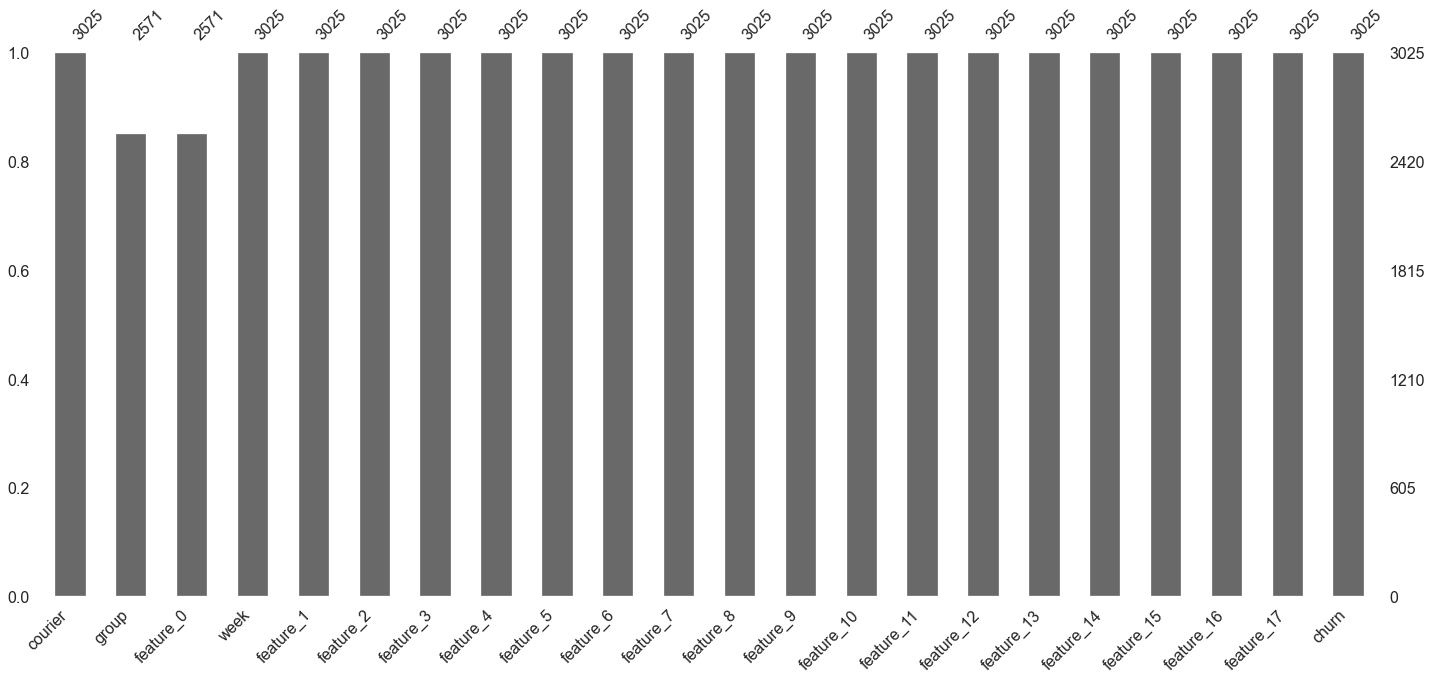

In [28]:
# Ploting missing values 
msno.bar(df_working) 

In [29]:
df_working.isnull().sum()

courier         0
group         454
feature_0     454
week            0
feature_1       0
feature_2       0
feature_3       0
feature_4       0
feature_5       0
feature_6       0
feature_7       0
feature_8       0
feature_9       0
feature_10      0
feature_11      0
feature_12      0
feature_13      0
feature_14      0
feature_15      0
feature_16      0
feature_17      0
churn           0
dtype: int64

- For columns group and feature 0 there are 454 lines with null values (15%). This means we have weekly data from some couriers but not life time data.
- As a **businiess strategy**, it should be checked how the systems are collecting these data so this mistake could be avoided

<AxesSubplot:ylabel='Frequency'>

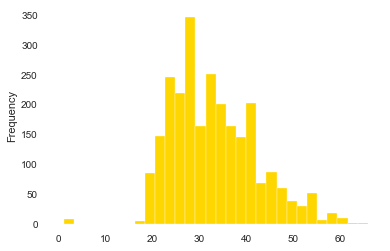

In [30]:
#Understanding data distrbution for feature 0 to what to do with null values
df_working.feature_0.plot.hist(bins=30,color = 'gold')


- As we mentioned in the previous exploratory analysis and after deleiting rows for week < 8, feature_0 has a Poisson distribution. 
- Poisson distribution X∼P(λ) has an uni-parametric in nature. As we can see, only one parameter λ is sufficient to define the distribution.
The mean of X∼P(λ)is equal to λ. So, the most efficient strategy will be to fill with the mean of the distribution since it is its charectistic value. 



- Alternatively, it could be estimated with various prediction algorithms such as  Mean Squared Error Stimator (MSE) or K-Nearest Neighbors in order to have more realistic values. 



a      1625
b       772
NAN     454
d       173
c         1
Name: group, dtype: int64

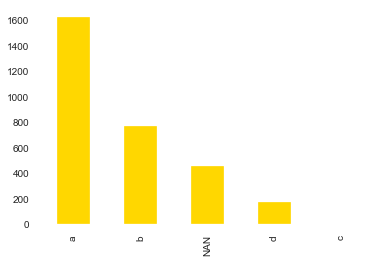

In [31]:
# Understanding group missing values
df_working.group.fillna('NAN').value_counts().plot.bar(color = 'gold')
df_working.group.fillna('NAN').value_counts()

- Since Group column shows categorical values that define differnet groups and, at the same time, it is unknown the reason why some riders have not been assigned to a group. It will be consider they form a group by itself. It will be characterised as "e"
- Depending on how important the group classification is, as a **business strategy** it might be considered to detect the fault of this problem

In [32]:
# Filling nan for group and feature_0 columns
df_fillna = df_working.copy()
df_fillna.group = df_fillna.group.fillna('e')
df_fillna.feature_0 = df_fillna.feature_0.fillna(df_fillna['feature_0'].mean())
df_fillna.describe()

courier    feature_0         week    feature_1    feature_2  \
count    3025.000000  3025.000000  3025.000000  3025.000000  3025.000000   
mean   368198.358347    32.971606     3.292231    -2.893223    43.383140   
std    127993.952842     8.424520     2.252106    16.372872    23.770959   
min      3767.000000     1.000000     0.000000  -138.000000     1.000000   
25%    281494.000000    27.000000     1.000000   -11.000000    26.000000   
50%    406948.000000    32.971606     3.000000    -2.000000    40.000000   
75%    467864.000000    37.000000     5.000000     6.000000    57.000000   
max    519341.000000    66.000000     7.000000    77.000000   169.000000   

         feature_3    feature_4    feature_5    feature_6    feature_7  \
count  3025.000000  3025.000000  3025.000000  3025.000000  3025.000000   
mean     54.476033     0.076942     0.923059   104.688290     0.065939   
std      30.592909     0.072091     0.072091     8.809467     0.065232   
min       1.000000     0.000000     0.000000    92.857100     0.000000   
25%      31.000000     0.026700     0.888900   100.000000     0.014700   
50%      51.000000     0.062500     0.937500   100.750000     0.051700   
75%      74.000000     0.111100     0.973300   105.400000     0.098200   
max     184.000000     1.000000     1.000000   197.739100     0.666700   

          feature_8    feature_9   feature_10   feature_11   feature_12  \
count   3025.000000  3025.000000  3025.000000  3025.000000  3025.000000   
mean    4070.988724     0.748000     9.796565    20.252893    20.032864   
std     1298.174332     0.138595     1.851199    12.224470     3.276434   
min     1445.666700     0.000000     2.575000     0.000000     7.140000   
25%     2761.015900     0.670100     8.601107    11.000000    18.145942   
50%     4167.511100     0.763200     9.703900    19.000000    19.662683   
75%     4941.105300     0.846200    10.805563    27.000000    21.400312   
max    12593.900000     1.000000    20.546667    82.000000    66.400000   

        feature_13   feature_14   feature_15   feature_16   feature_17  \
count  3025.000000  3025.000000  3025.000000  3025.000000  3025.000000   
mean      5.293364     0.764485    70.344298     2.207273    13.469752   
std       0.981991     0.168306    18.660267     1.487941    12.423356   
min       3.507143     0.000000     2.957809     1.000000     1.000000   
25%       4.607222     0.722200    59.786836     1.000000     5.000000   
50%       5.169545     0.802000    73.398889     2.000000    11.000000   
75%       5.728191     0.867600    83.759259     3.000000    17.000000   
max      10.917143     1.000000   180.861111    13.000000   195.000000   

             churn  
count  3025.000000  
mean      0.349091  
std       0.476762  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

count    3025.000000
mean       32.971606
std         8.424520
min         1.000000
25%        27.000000
50%        32.971606
75%        37.000000
max        66.000000
Name: feature_0, dtype: float64

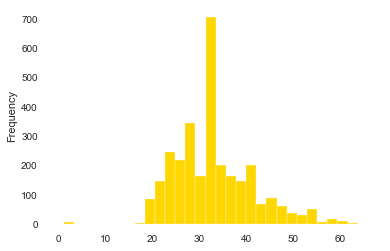

In [33]:
#plotting feature_0 new distribution
df_fillna.feature_0.plot.hist(bins=30,color = 'gold')
df_fillna.feature_0.describe()

- The standard deviation after filling null values has been slightly reduced. 

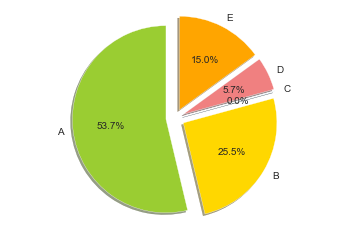

In [34]:
# Plotting final configuration for different groups after creating a new group
labels = 'A', 'B','C','D', 'E' 
#total_a_b = df.feature_1.value_counts().loc['a'] + df_lifetime_data_cleaned.feature_1.value_counts().loc['b']sizes = [df_lifetime_data_cleaned.feature_1.value_counts().loc['a'],
sizes =[df_fillna.group.value_counts().loc['a'],
        df_fillna.group.value_counts().loc['b'],
         df_fillna.group.value_counts().loc['c'],
         df_fillna.group.value_counts().loc['d'],
        df_fillna.group.value_counts().loc['e']]
explode = (0.1, 0.1,0.1, 0.1,0.1) 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,colors = colors)
ax1.axis('equal') 

plt.show()

### Understanding feature distributions

- In order to understand what to do with the features before fitting them into the models, it is needed to see their distributions. Specially focused on Normal Distributions. 

In [36]:
df = df_fillna.copy()

In [37]:
# Create function to plot the histogram for every feature 
def individual_hist(key):
    print(df[key].describe())
    return df[key].plot.hist(bins=50, color = 'gold')
    #plt.xlabel(key)

count      3025.000000
mean     368198.358347
std      127993.952842
min        3767.000000
25%      281494.000000
50%      406948.000000
75%      467864.000000
max      519341.000000
Name: courier, dtype: float64


<AxesSubplot:ylabel='Frequency'>

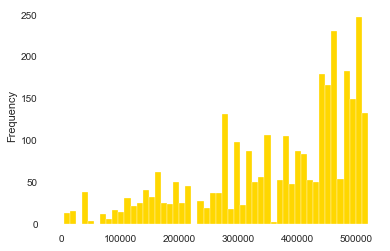

In [38]:
individual_hist('courier')


- It shows a negative skewness which could lead to realise that last registerd couriers are the one active in the platform (if the number of registration is linked to the the time they had registered)
- Since this information has not been provided, it will be dropped before fitting models

count    3025.000000
mean        3.292231
std         2.252106
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max         7.000000
Name: week, dtype: float64


<AxesSubplot:ylabel='Frequency'>

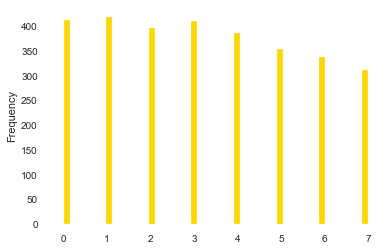

In [39]:
individual_hist('week')

- It shows roughly an uniform distribution so it is supposed not to add much predicting value

count    3025.000000
mean       32.971606
std         8.424520
min         1.000000
25%        27.000000
50%        32.971606
75%        37.000000
max        66.000000
Name: feature_0, dtype: float64


<AxesSubplot:ylabel='Frequency'>

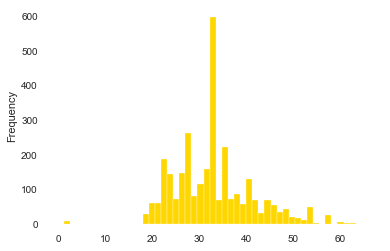

In [40]:
individual_hist('feature_0')

- As it has been mentioned before, it has a Poisson distribution with lambda = 32.9

count    3025.000000
mean       -2.893223
std        16.372872
min      -138.000000
25%       -11.000000
50%        -2.000000
75%         6.000000
max        77.000000
Name: feature_1, dtype: float64


<AxesSubplot:ylabel='Frequency'>

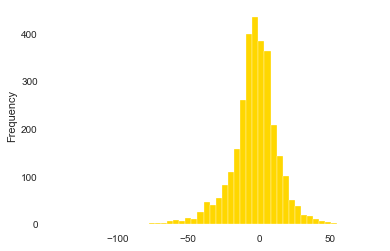

In [41]:
individual_hist('feature_1')

- Feature_1 has a normal distribution so we might avoid any transformation

count    3025.000000
mean       43.383140
std        23.770959
min         1.000000
25%        26.000000
50%        40.000000
75%        57.000000
max       169.000000
Name: feature_2, dtype: float64


<AxesSubplot:ylabel='Frequency'>

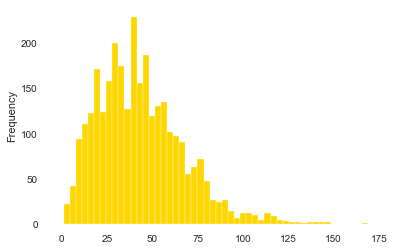

In [42]:
individual_hist('feature_2')

- Similar to feature_2, it has a Poisson distribution with lambda 43.3. It might need tranformation to improve model performanc

count    3025.000000
mean       54.476033
std        30.592909
min         1.000000
25%        31.000000
50%        51.000000
75%        74.000000
max       184.000000
Name: feature_3, dtype: float64


<AxesSubplot:ylabel='Frequency'>

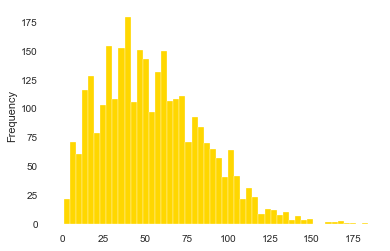

In [43]:
individual_hist('feature_3')

- Similar to feature_3, it has a Poisson distribution. It might need tranformation to improve model performance

count    3025.000000
mean        0.076942
std         0.072091
min         0.000000
25%         0.026700
50%         0.062500
75%         0.111100
max         1.000000
Name: feature_4, dtype: float64


<AxesSubplot:ylabel='Frequency'>

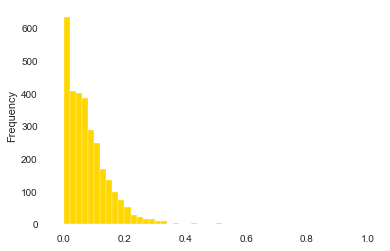

In [44]:
individual_hist('feature_4')

- feature_4 has large positive skewness. It might need transformation since it is not normal

count    3025.000000
mean        0.923059
std         0.072091
min         0.000000
25%         0.888900
50%         0.937500
75%         0.973300
max         1.000000
Name: feature_5, dtype: float64


<AxesSubplot:ylabel='Frequency'>

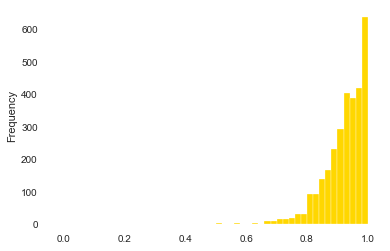

In [45]:
individual_hist('feature_5')

- feature_5 has large negative skewness. It might need transformation since it is not normal. 

count    3025.000000
mean      104.688290
std         8.809467
min        92.857100
25%       100.000000
50%       100.750000
75%       105.400000
max       197.739100
Name: feature_6, dtype: float64


<AxesSubplot:ylabel='Frequency'>

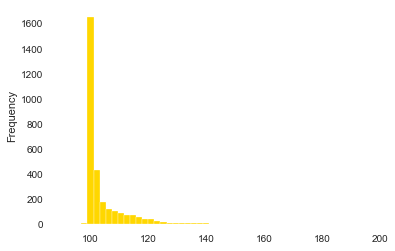

In [46]:
individual_hist('feature_6')

- feature_6 has large positive skewness. It might need transformation since it is not normal. 

count    3025.000000
mean        0.065939
std         0.065232
min         0.000000
25%         0.014700
50%         0.051700
75%         0.098200
max         0.666700
Name: feature_7, dtype: float64


<AxesSubplot:ylabel='Frequency'>

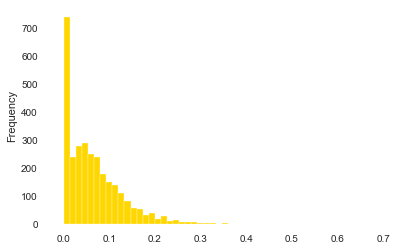

In [47]:
individual_hist('feature_7')

- feature_7 has large negative skewness. It might need transformation since it is not normal. 

count     3025.000000
mean      4070.988724
std       1298.174332
min       1445.666700
25%       2761.015900
50%       4167.511100
75%       4941.105300
max      12593.900000
Name: feature_8, dtype: float64


<AxesSubplot:ylabel='Frequency'>

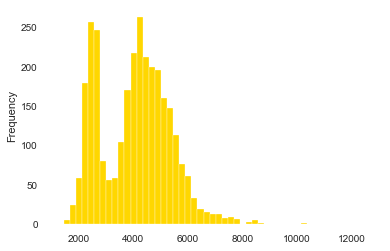

In [48]:
individual_hist('feature_8')

- feature_8 is a bimodal distribution that might need transformation 

count    3025.000000
mean        0.748000
std         0.138595
min         0.000000
25%         0.670100
50%         0.763200
75%         0.846200
max         1.000000
Name: feature_9, dtype: float64


<AxesSubplot:ylabel='Frequency'>

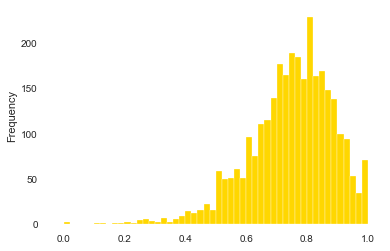

In [49]:
individual_hist('feature_9')

- feature_9 has large negative skewness. It might need transformation since it is not normal. 

count    3025.000000
mean        9.796565
std         1.851199
min         2.575000
25%         8.601107
50%         9.703900
75%        10.805563
max        20.546667
Name: feature_10, dtype: float64


<AxesSubplot:ylabel='Frequency'>

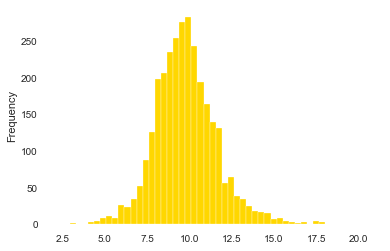

In [50]:
individual_hist('feature_10')

- feature_10 has roughly a normal distribution with a longer right tail

count    3025.000000
mean       20.252893
std        12.224470
min         0.000000
25%        11.000000
50%        19.000000
75%        27.000000
max        82.000000
Name: feature_11, dtype: float64


<AxesSubplot:ylabel='Frequency'>

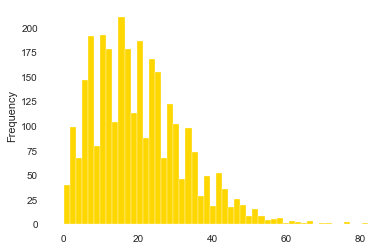

In [51]:
individual_hist('feature_11')

- feature_11 has large positive skewness. It might need transformation since it is not normal. 

count    3025.000000
mean       20.032864
std         3.276434
min         7.140000
25%        18.145942
50%        19.662683
75%        21.400312
max        66.400000
Name: feature_12, dtype: float64


<AxesSubplot:ylabel='Frequency'>

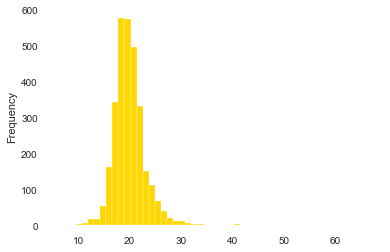

In [52]:
individual_hist('feature_12')

- feature_12 has roughly a normal distribution with a longer right tail

count    3025.000000
mean        5.293364
std         0.981991
min         3.507143
25%         4.607222
50%         5.169545
75%         5.728191
max        10.917143
Name: feature_13, dtype: float64


<AxesSubplot:ylabel='Frequency'>

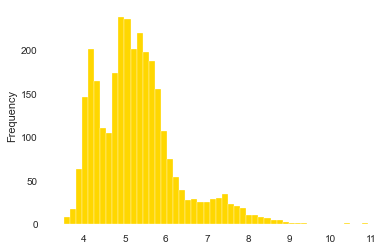

In [53]:
individual_hist('feature_13')

- feature_13 is a bimodal distribution that might need transformation 

count    3025.000000
mean        0.764485
std         0.168306
min         0.000000
25%         0.722200
50%         0.802000
75%         0.867600
max         1.000000
Name: feature_14, dtype: float64


<AxesSubplot:ylabel='Frequency'>

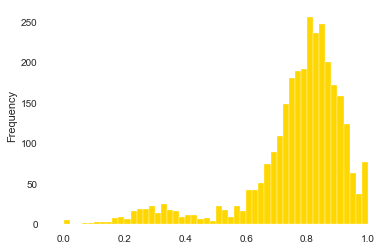

In [54]:
individual_hist('feature_14')

- feature_14 has large negative skewness. It might need transformation since it is not normal. 

count    3025.000000
mean       70.344298
std        18.660267
min         2.957809
25%        59.786836
50%        73.398889
75%        83.759259
max       180.861111
Name: feature_15, dtype: float64


<AxesSubplot:ylabel='Frequency'>

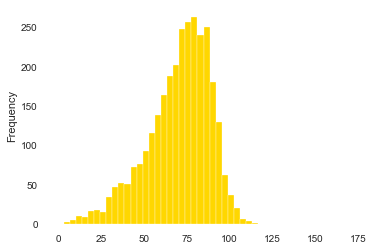

In [55]:
individual_hist('feature_15')

- feature_15 has a roughly normal distribution with a longer right tail

count    3025.000000
mean        2.207273
std         1.487941
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        13.000000
Name: feature_16, dtype: float64


<AxesSubplot:ylabel='Frequency'>

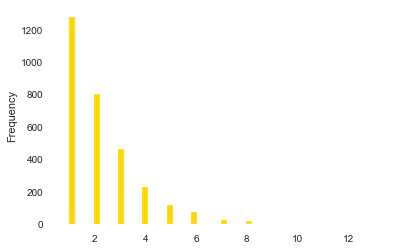

In [56]:
individual_hist('feature_16')

- feature_16 it has a Poisson distribution with lambda = 2.2

count    3025.000000
mean       13.469752
std        12.423356
min         1.000000
25%         5.000000
50%        11.000000
75%        17.000000
max       195.000000
Name: feature_17, dtype: float64


<AxesSubplot:ylabel='Frequency'>

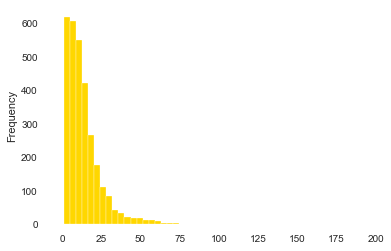

In [57]:
individual_hist('feature_17')

- feature_17 it has a Poisson distribution with lambda = 13.4

/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:3

array([[<AxesSubplot:title={'center':'churn'}>,
        <AxesSubplot:title={'center':'courier'}>,
        <AxesSubplot:title={'center':'feature_0'}>,
        <AxesSubplot:title={'center':'feature_1'}>,
        <AxesSubplot:title={'center':'feature_10'}>],
       [<AxesSubplot:title={'center':'feature_11'}>,
        <AxesSubplot:title={'center':'feature_12'}>,
        <AxesSubplot:title={'center':'feature_13'}>,
        <AxesSubplot:title={'center':'feature_14'}>,
        <AxesSubplot:title={'center':'feature_15'}>],
       [<AxesSubplot:title={'center':'feature_16'}>,
        <AxesSubplot:title={'center':'feature_17'}>,
        <AxesSubplot:title={'center':'feature_2'}>,
        <AxesSubplot:title={'center':'feature_3'}>,
        <AxesSubplot:title={'center':'feature_4'}>],
       [<AxesSubplot:title={'center':'feature_5'}>,
        <AxesSubplot:title={'center':'feature_6'}>,
        <AxesSubplot:title={'center':'feature_7'}>,
        <AxesSubplot:title={'center':'feature_8'}>,
       

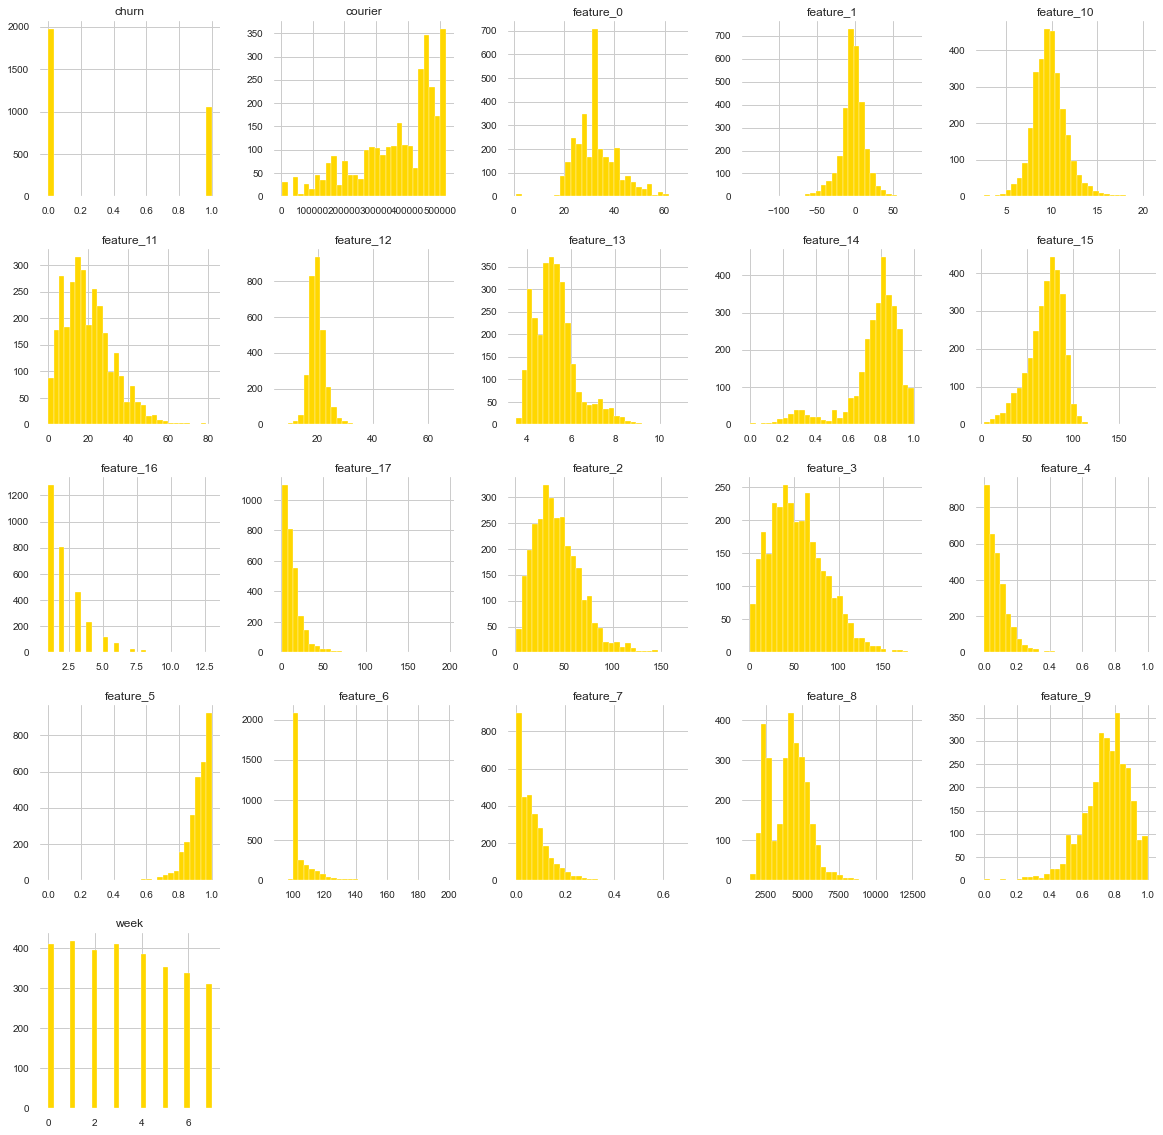

In [61]:
# Big picture of every feature distribution
df.hist(color = 'gold', figsize = (20,20), bins = 30)

### Target Variable

0    1969
1    1056
Name: churn, dtype: int64


<AxesSubplot:>

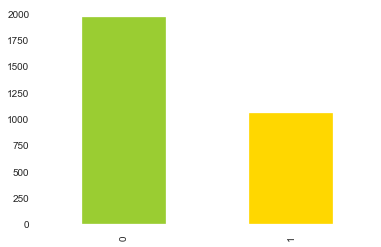

In [62]:
#Plotting number of rows of not churned and churned
print(df.churn.value_counts())
df.churn.value_counts().plot.bar(color = colors)

- Target Variable. Churn

    - From the 3025 rows, around 2000 rows have not churned. It is shown that, as usual, lower percentage of churned vs not churned. 
    - It is an imbalance ratio 65 not churned vs 45 churned classes
    - This imbalance will be considered when analysing the thresholds for the different classification models

### Visual analysis of feature distribution compare to churn vs not churn

- The goal is to see if churn and not churn are differently distributed for each variable, so it could be infered which variables are going to be more predicting potentially

In [64]:
# Showing which colummns are discrete, continuous or categorical 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3025 entries, 0 to 4115
Data columns (total 22 columns):
courier       3025 non-null int64
group         3025 non-null object
feature_0     3025 non-null float64
week          3025 non-null int64
feature_1     3025 non-null int64
feature_2     3025 non-null int64
feature_3     3025 non-null int64
feature_4     3025 non-null float64
feature_5     3025 non-null float64
feature_6     3025 non-null float64
feature_7     3025 non-null float64
feature_8     3025 non-null float64
feature_9     3025 non-null float64
feature_10    3025 non-null float64
feature_11    3025 non-null int64
feature_12    3025 non-null float64
feature_13    3025 non-null float64
feature_14    3025 non-null float64
feature_15    3025 non-null float64
feature_16    3025 non-null int64
feature_17    3025 non-null int64
churn         3025 non-null int64
dtypes: float64(12), int64(9), object(1)
memory usage: 543.6+ KB


In [65]:
# function to plot categorical/discrete variables vs churn
def feature_distribution(key): 
    
    fig, ax = plt.subplots(figsize=(10,7))  
    table = pd.crosstab(df[key],df.churn)
    table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color = colors,ax = ax)
    plt.title('STACKED BAR CHART OF '+ key.upper() + ' VS CHURN')
    plt.xlabel(key)
    plt.ylabel('Proportion of Churned vs Active Couriers')

    


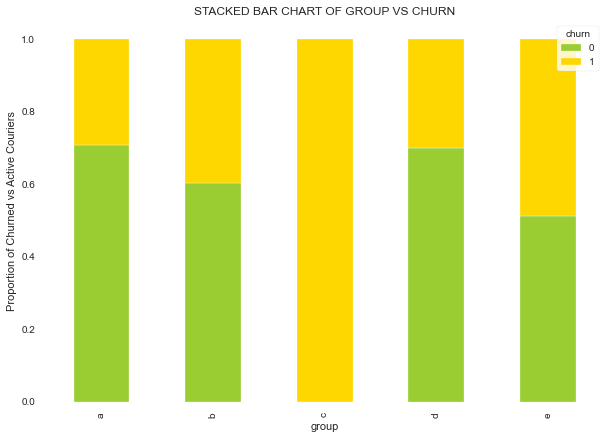

In [66]:
feature_distribution('group')  


- It does not show much variance so it will not have an important precticing value

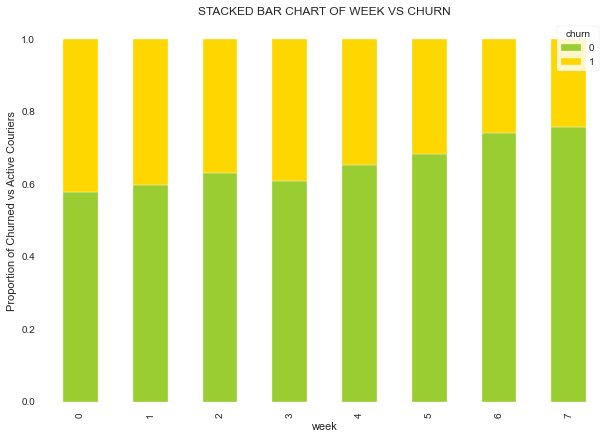

In [67]:
feature_distribution('week')  


- Week might not be a good predictor for churn but it can be conclude that there are less churned riders if they were actives in the previous weeks

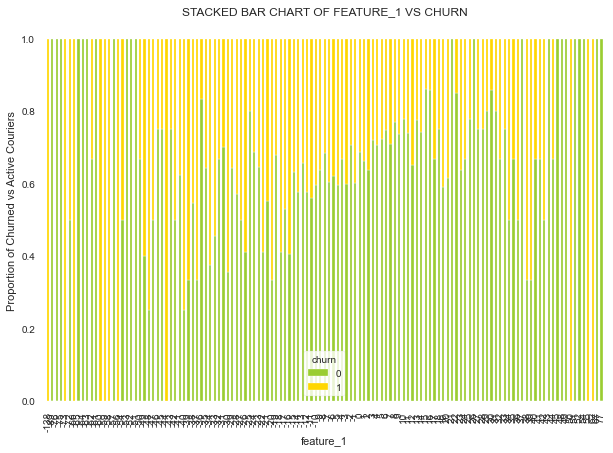

In [68]:
feature_distribution('feature_1')  


- Feature_1 might  be a good predictor for churn.

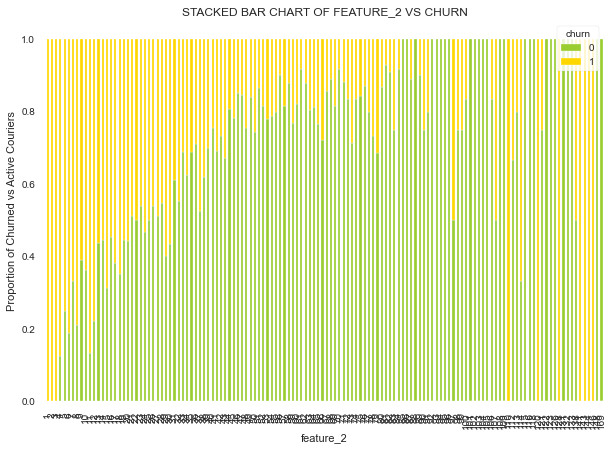

In [69]:
feature_distribution('feature_2')  


- Feature_2 might  be a good predictor for churn.

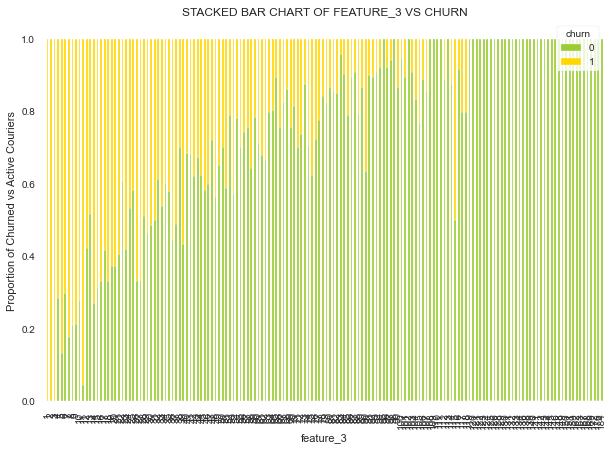

In [70]:
feature_distribution('feature_3')  


- Feature_3 might be a good predictor for churn but it shows that there might be less churned for bigger values of feature_3

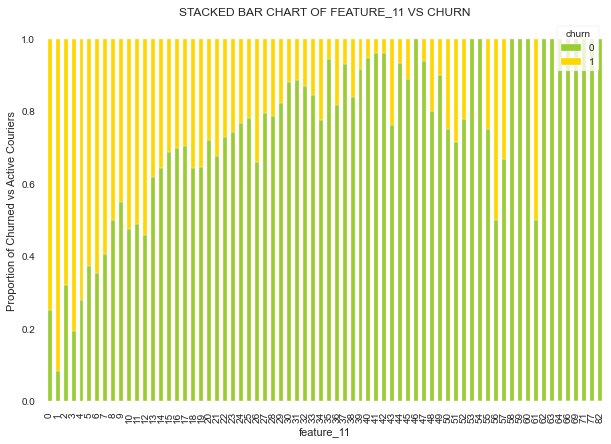

In [71]:
feature_distribution('feature_11')  


- Feature_11 might  be a good predictor for churn, especially because the largest riders with largest values of this feature do not churn

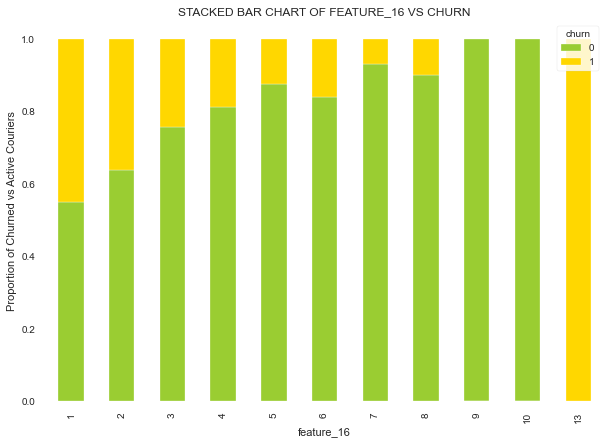

In [73]:
feature_distribution('feature_16')  


- Feature_16 might be a good predictor for churn 

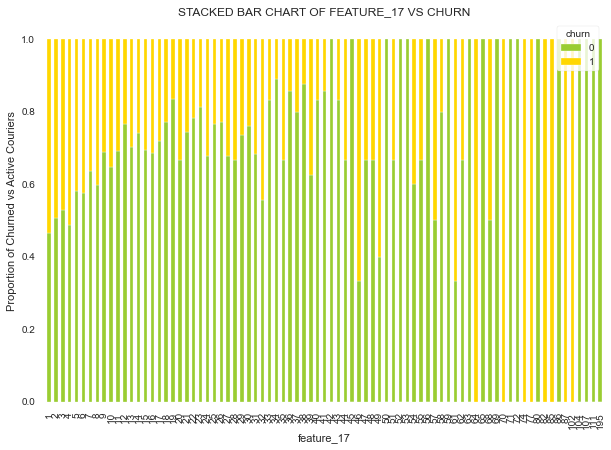

In [74]:
feature_distribution('feature_17')  


- Feature_17 might not be a good predictor for churn

feature_0


<Figure size 1008x360 with 0 Axes>

<Figure size 1008x360 with 0 Axes>

<Figure size 1008x360 with 0 Axes>

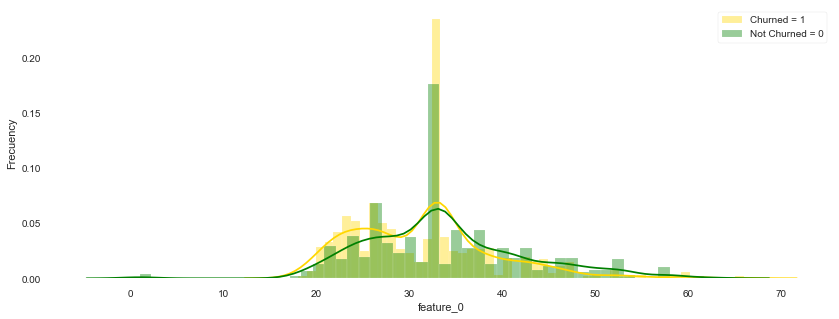

week


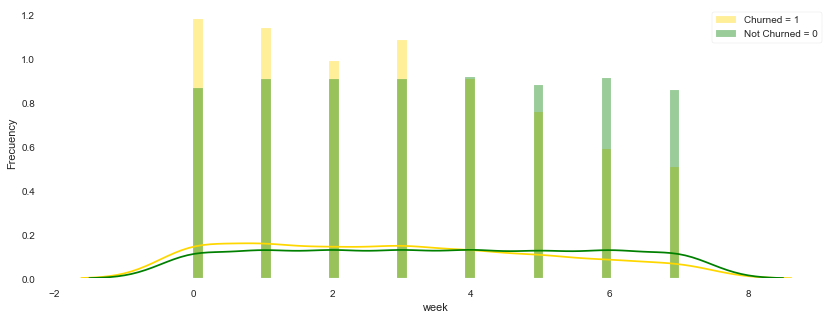

feature_1


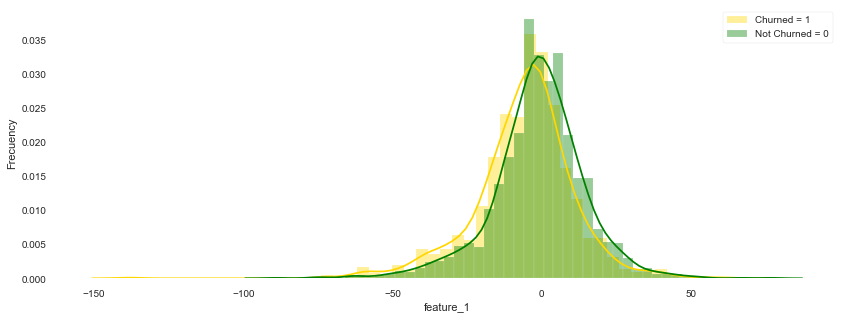

feature_2


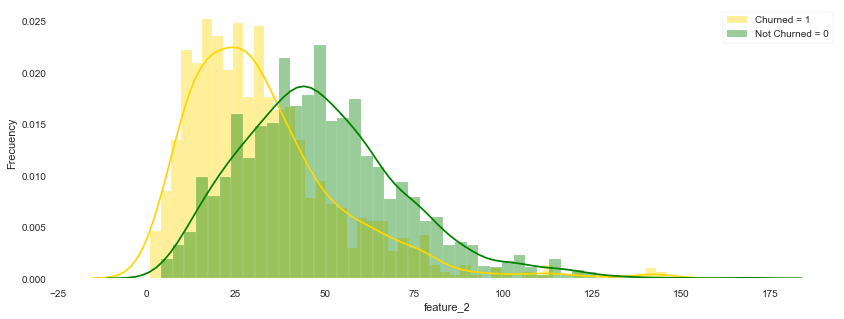

feature_3


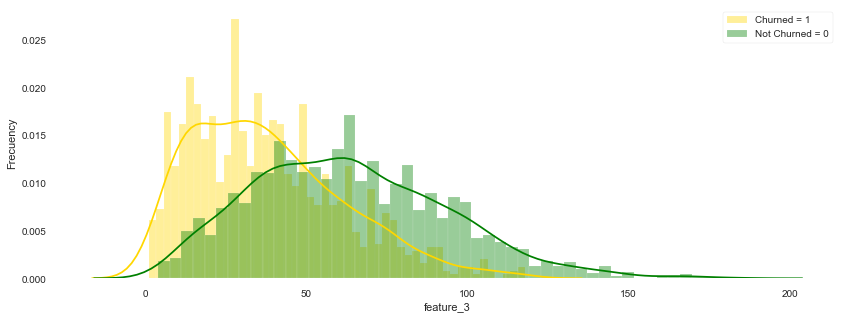

feature_4


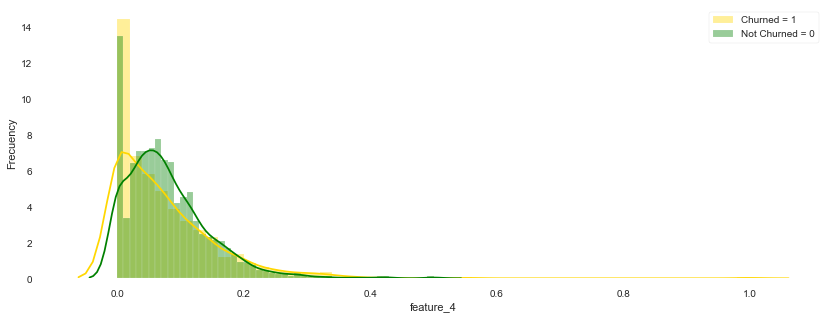

feature_5


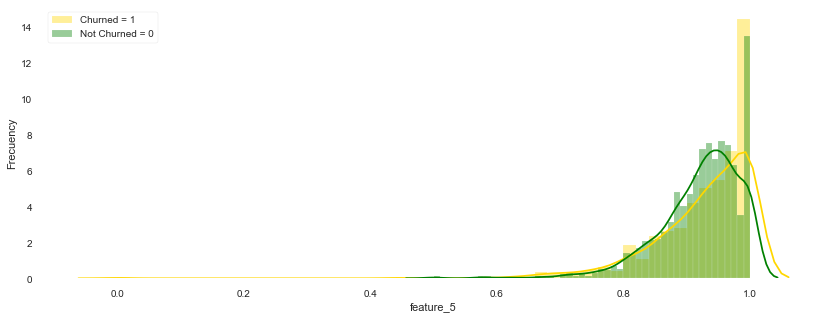

feature_6


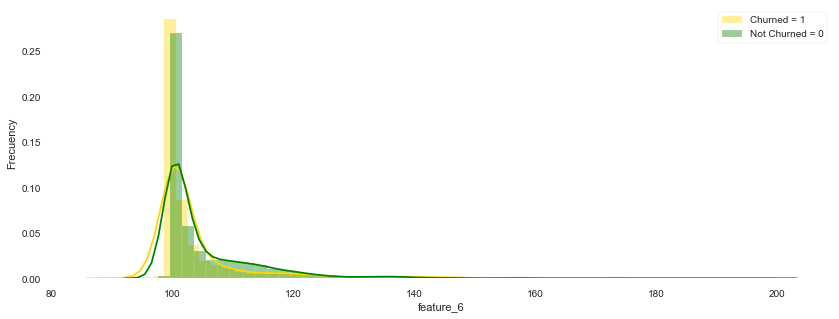

feature_7


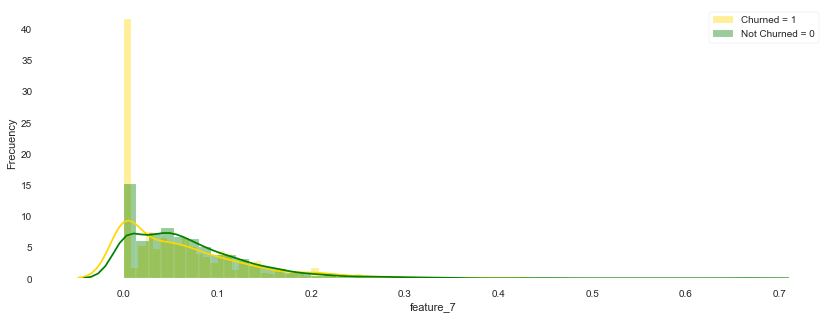

feature_8


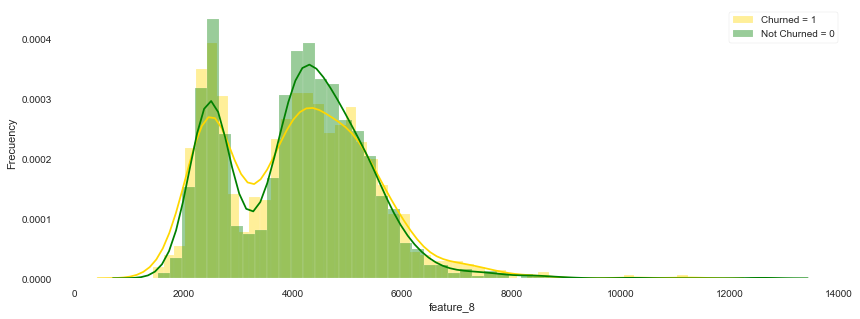

feature_9


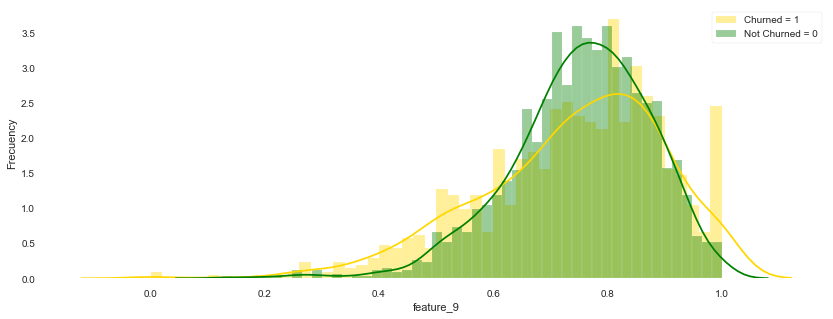

feature_10


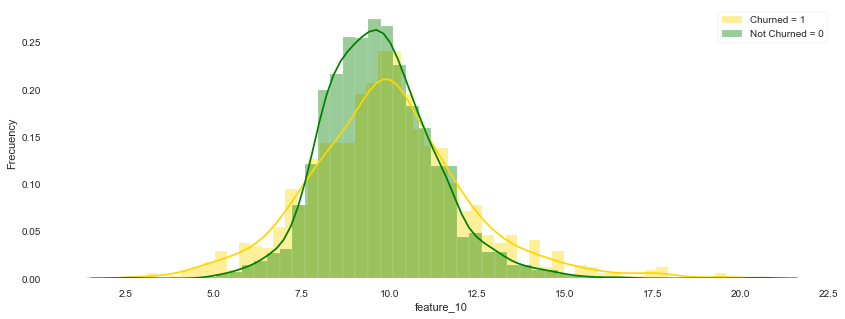

feature_11


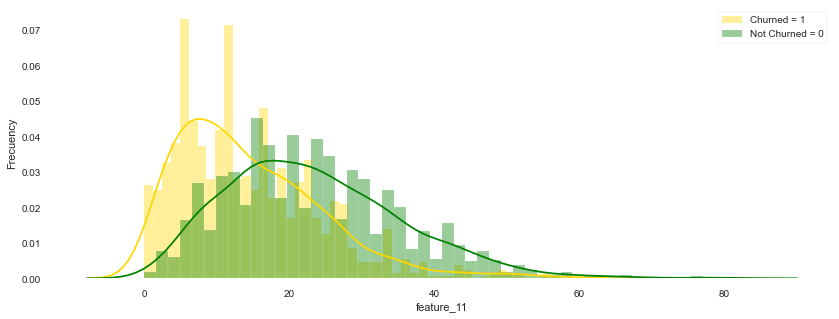

feature_12


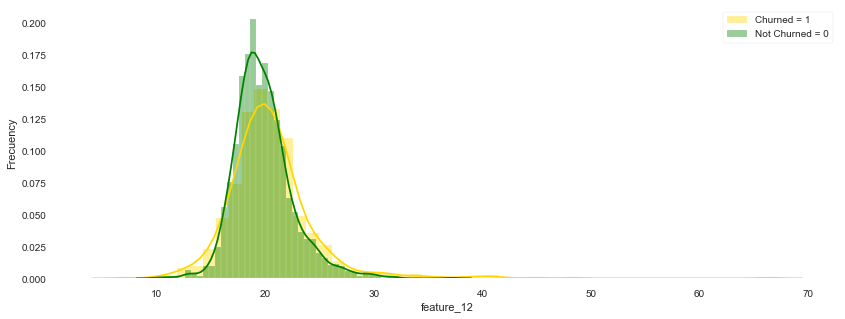

feature_13


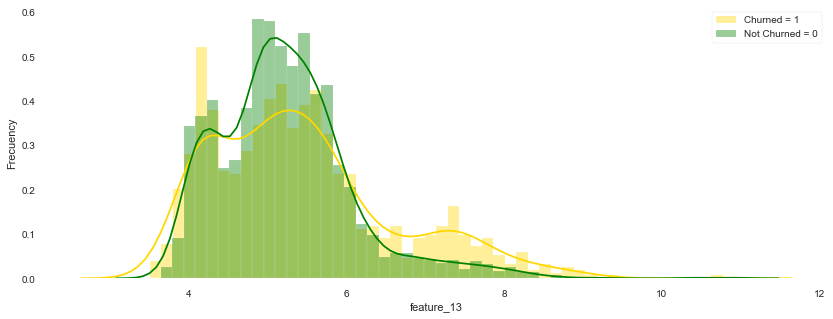

feature_14


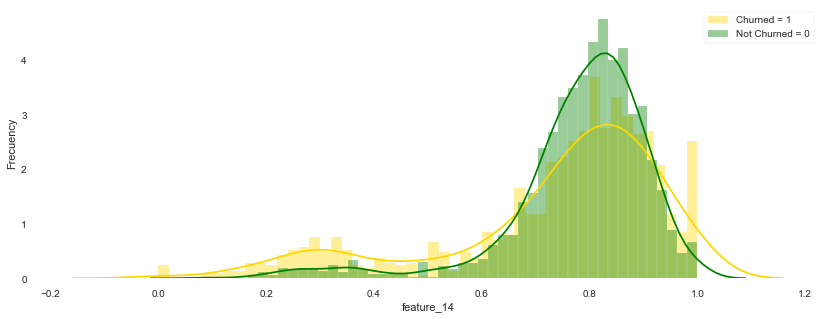

feature_15


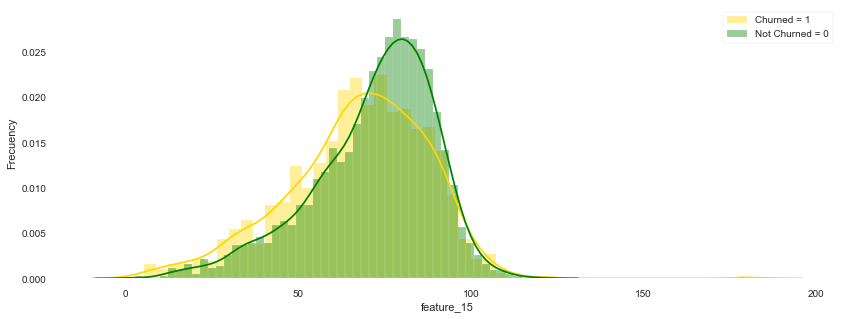

feature_16


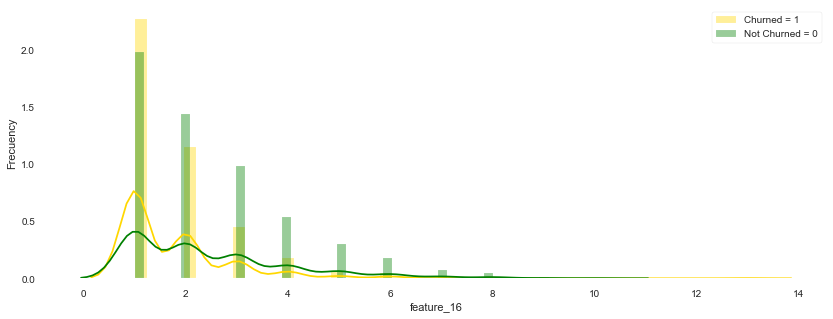

feature_17


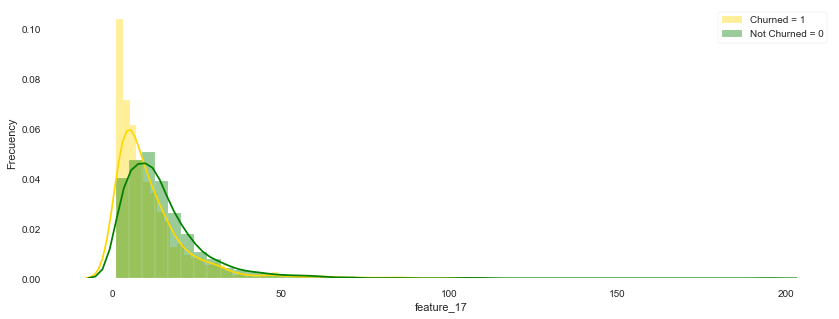

<Figure size 1008x360 with 0 Axes>

In [75]:
# Plot to understand if there are differences in distribution for each variable vs churn/not churned
plt.figure(figsize=(14,5))
for key in df.keys():
    plt.figure(figsize=(14,5))

    if key  not in ['courier','group','churn','active']:
        
        print(key)
        #df[key].plot.hist(bins=30,color = 'gold')
        sns.distplot(df[key][df['churn'] == 1], bins=50, label = 'Churned = 1', color = "gold")
        sns.distplot(df[key][df['churn'] == 0], bins=50, label = 'Not Churned = 0',color = 'green')
        plt.ylabel('Frecuency')
        plt.xlabel(key)
        plt.legend()
        plt.show()

#### Conclusions
   

- feature_0: Minor diffences in distribution
- week: Minor differences in distribution
- feature_1: Minor differences in distribution
- **feature_2: Significant differences in distribution**
- **feature_3: Significant differences in distribution**
- feature_4: Minor differences in distribution
- **feature_5: Almost no difference**
- feature_6: Minor differences in distribution
- feature_7: Minor differences in distribution
- feature_8: Minor differences in distribution
- feature_9: Minor differences in distribution but over the average 
- feature_10: Minor differences in distribution but over the average 
- **feature_11: Significant differences in distribution**
- **feature_12: Almost no difference**
- feature_13: Minor differences in distribution but over the average 
- feature_14: Minor differences in distribution but over the average 
- feature_15: Minor differences in distribution but over the average 
- feature_16: Minor differences in distribution
- feature_17: Minor differences in distribution


# Modelling

## Feature Engineering

- Applying different techniques to decide the selected features that have predicting power

### Correlations

- This techniques does not take into consideration the target values. It evaluates the relationships between each variable one-to-one. 
- If one or several variables are correlated, at least one of them must be deleted since it does not add much variance to the model and, at the same time, it might weight more than what actually weights. 

#### Linear correlation with Pearson’s correlation coefficient

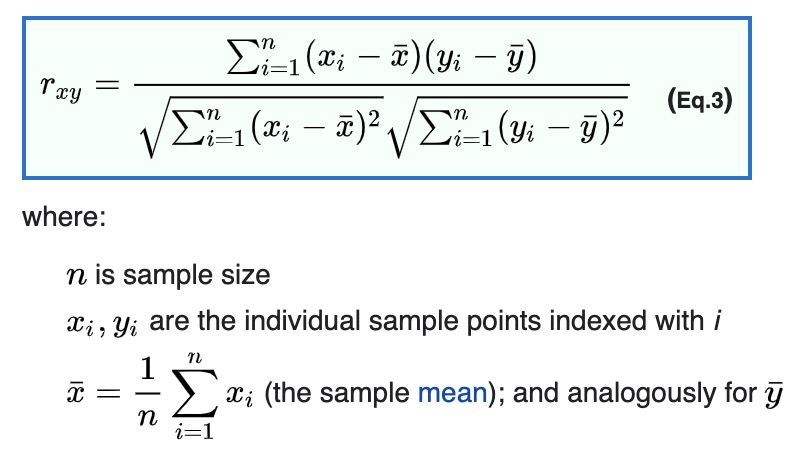

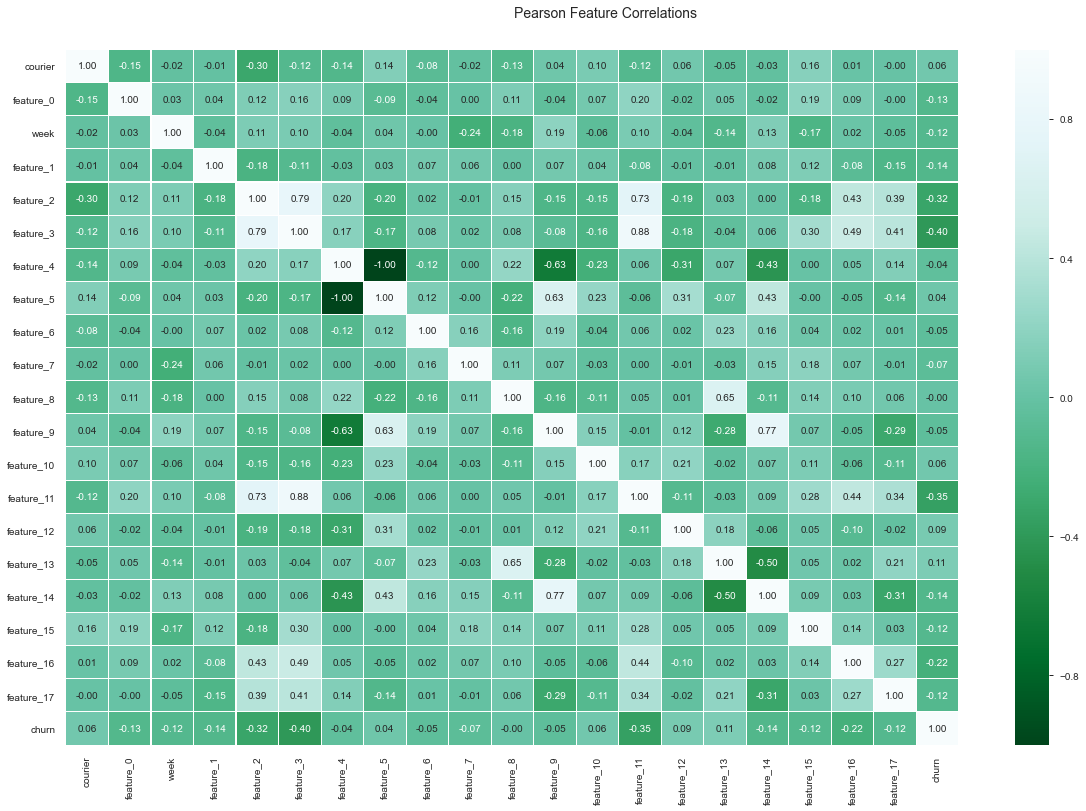

In [78]:
f, ax = plt.subplots(figsize=(20,12))
corr = df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="BuGn_r",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Pearson Feature Correlations', fontsize=14)


- Feature_4 and Feature_5 has a -1.00 corerelation value. One of them should be deleted since does not add value
- Feature_3 annd Feature_11 has 0.88 correlation. It will be kept since there are not so many features avaialbles

#### No Linear correlation with Spearman’s rank coefficient 


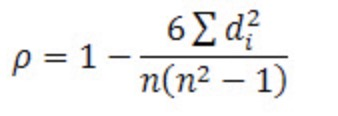

- Where d = difference between ranks and d2 = difference squared.

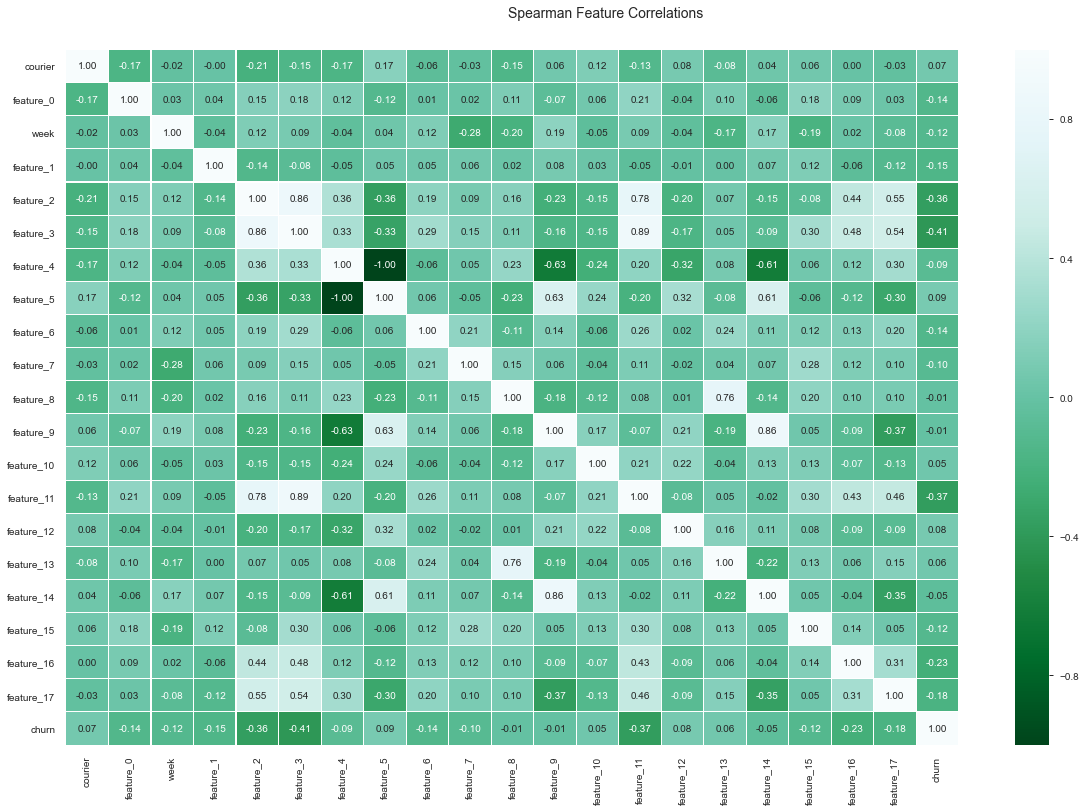

In [80]:
f, ax = plt.subplots(figsize=(20,12))
corr = df.corr(method='spearman')
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="BuGn_r",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Spearman Feature Correlations', fontsize=14)

- Feature_4 and Feature_5 has a -1.00 corerelation value. One of them should be deleted since does not add value
- Feature_2 and Feature 3 has 0.86 correlation value. It will be kept since there are not so many features availables
- Feature_2 and Feature_11 has 0.78 correlation. It will be kept since there are not so many features availables
- Feature_3 and Feature_11 has 0.89 correlation. It will be kept since there are not so many features availables

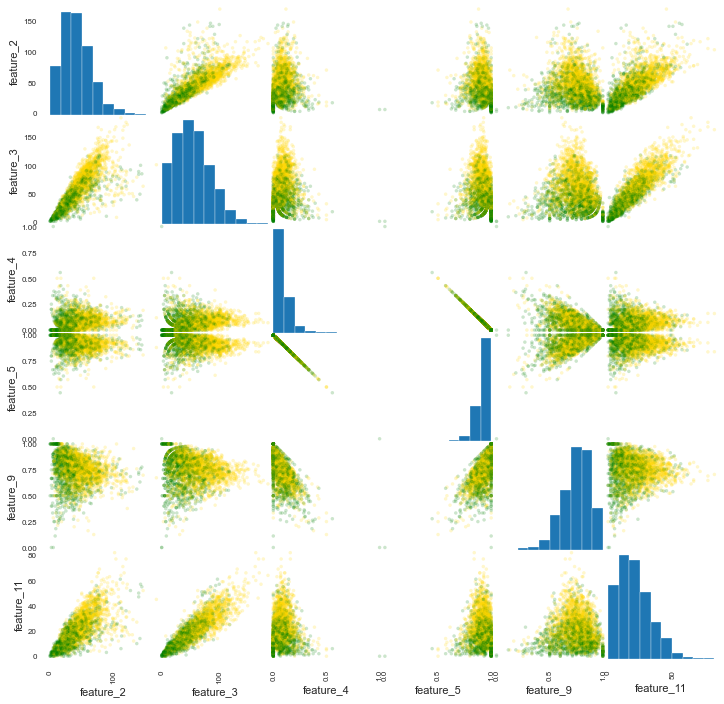

In [82]:
# Ploting the most correlated features to visualise the correlation

grad_colors = ['green' if ix else 'gold' for ix in df['churn']]

scatter_matrix(df[['feature_2','feature_3','feature_4', 'feature_5','feature_9', 'feature_11']], 
               alpha=0.2, figsize=(12,12), diagonal='hist', c = grad_colors)
plt.show()

In [318]:
#Dropping feature_5 since it is strongly correlated with feature_4
df_drop = df.copy()
df_drop = df.drop(['feature_4'], axis=1)


In [319]:
df_drop.describe()

courier    feature_0         week    feature_1    feature_2  \
count    3025.000000  3025.000000  3025.000000  3025.000000  3025.000000   
mean   368198.358347    32.971606     3.292231    -2.893223    43.383140   
std    127993.952842     8.424520     2.252106    16.372872    23.770959   
min      3767.000000     1.000000     0.000000  -138.000000     1.000000   
25%    281494.000000    27.000000     1.000000   -11.000000    26.000000   
50%    406948.000000    32.971606     3.000000    -2.000000    40.000000   
75%    467864.000000    37.000000     5.000000     6.000000    57.000000   
max    519341.000000    66.000000     7.000000    77.000000   169.000000   

         feature_3    feature_5    feature_6    feature_7     feature_8  \
count  3025.000000  3025.000000  3025.000000  3025.000000   3025.000000   
mean     54.476033     0.923059   104.688290     0.065939   4070.988724   
std      30.592909     0.072091     8.809467     0.065232   1298.174332   
min       1.000000     0.000000    92.857100     0.000000   1445.666700   
25%      31.000000     0.888900   100.000000     0.014700   2761.015900   
50%      51.000000     0.937500   100.750000     0.051700   4167.511100   
75%      74.000000     0.973300   105.400000     0.098200   4941.105300   
max     184.000000     1.000000   197.739100     0.666700  12593.900000   

         feature_9   feature_10   feature_11   feature_12   feature_13  \
count  3025.000000  3025.000000  3025.000000  3025.000000  3025.000000   
mean      0.748000     9.796565    20.252893    20.032864     5.293364   
std       0.138595     1.851199    12.224470     3.276434     0.981991   
min       0.000000     2.575000     0.000000     7.140000     3.507143   
25%       0.670100     8.601107    11.000000    18.145942     4.607222   
50%       0.763200     9.703900    19.000000    19.662683     5.169545   
75%       0.846200    10.805563    27.000000    21.400312     5.728191   
max       1.000000    20.546667    82.000000    66.400000    10.917143   

        feature_14   feature_15   feature_16   feature_17        churn  
count  3025.000000  3025.000000  3025.000000  3025.000000  3025.000000  
mean      0.764485    70.344298     2.207273    13.469752     0.349091  
std       0.168306    18.660267     1.487941    12.423356     0.476762  
min       0.000000     2.957809     1.000000     1.000000     0.000000  
25%       0.722200    59.786836     1.000000     5.000000     0.000000  
50%       0.802000    73.398889     2.000000    11.000000     0.000000  
75%       0.867600    83.759259     3.000000    17.000000     1.000000  
max       1.000000   180.861111    13.000000   195.000000     1.000000

## Data Transformation

-  Techniques to work with categorical data as well as changing feature distributions thay might be more convenient to fit to the models

### Encoding Categorical Values

In [361]:
df_encoded = pd.get_dummies(df_drop, prefix=['group'], columns = ['group'])

In [362]:
df_enconded_with_courier = df_encoded.copy()
df_enconded_with_courier

courier  feature_0  week  feature_1  feature_2  feature_3  feature_5  \
0        3767  33.000000     2          6         34         38     0.9211   
1        3767  33.000000     4         -1         42         37     1.0000   
2        3767  33.000000     5         24         41         43     0.9767   
3        3767  33.000000     6        -22         65         66     0.9394   
4        6282  35.000000     2          9         33         27     0.9259   
...       ...        ...   ...        ...        ...        ...        ...   
4111   519141  32.971606     2          6         27         42     0.9048   
4112   519141  32.971606     3          0         33         39     0.9744   
4113   519141  32.971606     4        -14         33         45     0.9111   
4114   519141  32.971606     5        -15         19         19     0.9474   
4115   519141  32.971606     6          8          4          6     1.0000   

      feature_6  feature_7  feature_8  feature_9  feature_10  feature_11  \
0      140.4737     0.1316  2162.4737     0.7632    7.340776           8   
1      135.5946     0.0811  2097.4054     0.9459   11.883784          19   
2      131.0930     0.0233  2043.8837     0.9302    7.072100          16   
3      120.1515     0.0000  2124.2727     0.7727    7.356567          33   
4      100.0000     0.0370  4075.7407     0.8889    8.501233           5   
...         ...        ...        ...        ...         ...         ...   
4111   101.4286     0.0000  4023.0714     0.4762    9.490076          17   
4112   100.0000     0.0000  4660.6410     0.3846    7.865387          13   
4113   107.1111     0.0000  4860.5778     0.5333    7.507404          16   
4114   101.0526     0.0000  5171.3158     0.5263   11.332463          10   
4115   163.5000     0.0000  3812.5000     0.6667    7.869450           3   

      feature_12  feature_13  feature_14  feature_15  feature_16  feature_17  \
0      20.208158    5.236316      0.8158   43.384804           1          19   
1      18.855405    5.689459      0.8919   35.078042           3          11   
2      18.925116    5.138605      0.9302   31.455285           1          10   
3      18.259697    4.704394      0.7879   34.252991           1          30   
4      26.863704    4.828519      0.8889   46.478114           1           4   
...          ...         ...         ...         ...         ...         ...   
4111   25.113333    7.395952      0.2381   79.612140           1          26   
4112   21.616410    7.709487      0.3333   65.714646           1          25   
4113   21.872444    8.436222      0.2889   72.696970           1          31   
4114   26.334737    8.205263      0.4737   55.758772           1          29   
4115   18.883333    8.793333      0.3333   49.479167           2           2   

      churn  group_a  group_b  group_c  group_d  group_e  
0         1        0        1        0        0        0  
1         1        0        1        0        0        0  
2         1        0        1        0        0        0  
3         1        0        1        0        0        0  
4         0        1        0        0        0        0  
...     ...      ...      ...      ...      ...      ...  
4111      1        0        0        0        0        1  
4112      1        0        0        0        0        1  
4113      1        0        0        0        0        1  
4114      1        0        0        0        0        1  
4115      1        0        0        0        0        1  

[3025 rows x 25 columns]

In [328]:
# Drop courier since it will not be considered for training
df_encoded = df_encoded.drop(['courier'], axis=1)
df_encoded.head()

feature_0  week  feature_1  feature_2  feature_3  feature_5  feature_6  \
0       33.0     2          6         34         38     0.9211   140.4737   
1       33.0     4         -1         42         37     1.0000   135.5946   
2       33.0     5         24         41         43     0.9767   131.0930   
3       33.0     6        -22         65         66     0.9394   120.1515   
4       35.0     2          9         33         27     0.9259   100.0000   

   feature_7  feature_8  feature_9  feature_10  feature_11  feature_12  \
0     0.1316  2162.4737     0.7632    7.340776           8   20.208158   
1     0.0811  2097.4054     0.9459   11.883784          19   18.855405   
2     0.0233  2043.8837     0.9302    7.072100          16   18.925116   
3     0.0000  2124.2727     0.7727    7.356567          33   18.259697   
4     0.0370  4075.7407     0.8889    8.501233           5   26.863704   

   feature_13  feature_14  feature_15  feature_16  feature_17  churn  group_a  \
0    5.236316      0.8158   43.384804           1          19      1        0   
1    5.689459      0.8919   35.078042           3          11      1        0   
2    5.138605      0.9302   31.455285           1          10      1        0   
3    4.704394      0.7879   34.252991           1          30      1        0   
4    4.828519      0.8889   46.478114           1           4      0        1   

   group_b  group_c  group_d  group_e  
0        1        0        0        0  
1        1        0        0        0  
2        1        0        0        0  
3        1        0        0        0  
4        0        0        0        0

In [329]:
df_encoded.keys()

Index(['feature_0', 'week', 'feature_1', 'feature_2', 'feature_3', 'feature_5',
       'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10',
       'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15',
       'feature_16', 'feature_17', 'churn', 'group_a', 'group_b', 'group_c',
       'group_d', 'group_e'],
      dtype='object')

In [97]:
# Spliting target variable from the rest of the dataset
df_final_y = df_encoded.loc[:, df_encoded.columns == 'churn']
df_final_X = df_encoded.loc[:, df_encoded.columns != 'churn']
df_final_X

feature_0  week  feature_1  feature_2  feature_3  feature_4  feature_5  \
0     33.000000     2          6         34         38     0.0789     0.9211   
1     33.000000     4         -1         42         37     0.0000     1.0000   
2     33.000000     5         24         41         43     0.0233     0.9767   
3     33.000000     6        -22         65         66     0.0606     0.9394   
4     35.000000     2          9         33         27     0.0741     0.9259   
...         ...   ...        ...        ...        ...        ...        ...   
4111  32.971606     2          6         27         42     0.0952     0.9048   
4112  32.971606     3          0         33         39     0.0256     0.9744   
4113  32.971606     4        -14         33         45     0.0889     0.9111   
4114  32.971606     5        -15         19         19     0.0526     0.9474   
4115  32.971606     6          8          4          6     0.0000     1.0000   

      feature_6  feature_7  feature_8  feature_9  feature_10  feature_11  \
0      140.4737     0.1316  2162.4737     0.7632    7.340776           8   
1      135.5946     0.0811  2097.4054     0.9459   11.883784          19   
2      131.0930     0.0233  2043.8837     0.9302    7.072100          16   
3      120.1515     0.0000  2124.2727     0.7727    7.356567          33   
4      100.0000     0.0370  4075.7407     0.8889    8.501233           5   
...         ...        ...        ...        ...         ...         ...   
4111   101.4286     0.0000  4023.0714     0.4762    9.490076          17   
4112   100.0000     0.0000  4660.6410     0.3846    7.865387          13   
4113   107.1111     0.0000  4860.5778     0.5333    7.507404          16   
4114   101.0526     0.0000  5171.3158     0.5263   11.332463          10   
4115   163.5000     0.0000  3812.5000     0.6667    7.869450           3   

      feature_12  feature_13  feature_14  feature_15  feature_16  feature_17  \
0      20.208158    5.236316      0.8158   43.384804           1          19   
1      18.855405    5.689459      0.8919   35.078042           3          11   
2      18.925116    5.138605      0.9302   31.455285           1          10   
3      18.259697    4.704394      0.7879   34.252991           1          30   
4      26.863704    4.828519      0.8889   46.478114           1           4   
...          ...         ...         ...         ...         ...         ...   
4111   25.113333    7.395952      0.2381   79.612140           1          26   
4112   21.616410    7.709487      0.3333   65.714646           1          25   
4113   21.872444    8.436222      0.2889   72.696970           1          31   
4114   26.334737    8.205263      0.4737   55.758772           1          29   
4115   18.883333    8.793333      0.3333   49.479167           2           2   

      group_a  group_b  group_c  group_d  group_e  
0           0        1        0        0        0  
1           0        1        0        0        0  
2           0        1        0        0        0  
3           0        1        0        0        0  
4           1        0        0        0        0  
...       ...      ...      ...      ...      ...  
4111        0        0        0        0        1  
4112        0        0        0        0        1  
4113        0        0        0        0        1  
4114        0        0        0        0        1  
4115        0        0        0        0        1  

[3025 rows x 24 columns]

### Normalize Numerical Variables

- Rescale each feature to have values between 0 and 1 ending with smaller variance and supressing outliers 
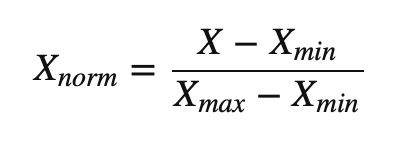

In [93]:
def normalize(df):
    data = df_encoded.copy()
    for feature_name in data.keys():
        if feature_name not in ['group_a', 'group_b', 'group_c', 'group_d', 'group_e',  'churn','courier']:
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            data[feature_name] = (df_drop[feature_name] - min_value) / (max_value - min_value)
    return data
df_normalize = normalize(df)

In [94]:
df_normalize.head()

feature_0      week  feature_1  feature_2  feature_3  feature_4  feature_5  \
0   0.492308  0.285714   0.669767   0.196429   0.202186     0.0789     0.9211   
1   0.492308  0.571429   0.637209   0.244048   0.196721     0.0000     1.0000   
2   0.492308  0.714286   0.753488   0.238095   0.229508     0.0233     0.9767   
3   0.492308  0.857143   0.539535   0.380952   0.355191     0.0606     0.9394   
4   0.523077  0.285714   0.683721   0.190476   0.142077     0.0741     0.9259   

   feature_6  feature_7  feature_8  feature_9  feature_10  feature_11  \
0   0.454002   0.197390   0.064298     0.7632    0.265183    0.097561   
1   0.407482   0.121644   0.058461     0.9459    0.517970    0.231707   
2   0.364561   0.034948   0.053660     0.9302    0.250233    0.195122   
3   0.260239   0.000000   0.060871     0.7727    0.266061    0.402439   
4   0.068104   0.055497   0.235918     0.8889    0.329754    0.060976   

   feature_12  feature_13  feature_14  feature_15  feature_16  feature_17  \
0    0.220522    0.233357      0.8158    0.227241    0.000000    0.092784   
1    0.197695    0.294510      0.8919    0.180549    0.166667    0.051546   
2    0.198871    0.220170      0.9302    0.160185    0.000000    0.046392   
3    0.187643    0.161572      0.7879    0.175911    0.000000    0.149485   
4    0.332833    0.178323      0.8889    0.244629    0.000000    0.015464   

   churn  group_a  group_b  group_c  group_d  group_e  
0      1        0        1        0        0        0  
1      1        0        1        0        0        0  
2      1        0        1        0        0        0  
3      1        0        1        0        0        0  
4      0        1        0        0        0        0

- **For some previous iterations, the models have been runned with normalized variables, but they perform poorer for every model**
- Sinice then, it was applied standarisation to X features. 

array([[<AxesSubplot:title={'center':'churn'}>,
        <AxesSubplot:title={'center':'feature_0'}>,
        <AxesSubplot:title={'center':'feature_1'}>,
        <AxesSubplot:title={'center':'feature_10'}>,
        <AxesSubplot:title={'center':'feature_11'}>],
       [<AxesSubplot:title={'center':'feature_12'}>,
        <AxesSubplot:title={'center':'feature_13'}>,
        <AxesSubplot:title={'center':'feature_14'}>,
        <AxesSubplot:title={'center':'feature_15'}>,
        <AxesSubplot:title={'center':'feature_16'}>],
       [<AxesSubplot:title={'center':'feature_17'}>,
        <AxesSubplot:title={'center':'feature_2'}>,
        <AxesSubplot:title={'center':'feature_3'}>,
        <AxesSubplot:title={'center':'feature_4'}>,
        <AxesSubplot:title={'center':'feature_5'}>],
       [<AxesSubplot:title={'center':'feature_6'}>,
        <AxesSubplot:title={'center':'feature_7'}>,
        <AxesSubplot:title={'center':'feature_8'}>,
        <AxesSubplot:title={'center':'feature_9'}>,
     

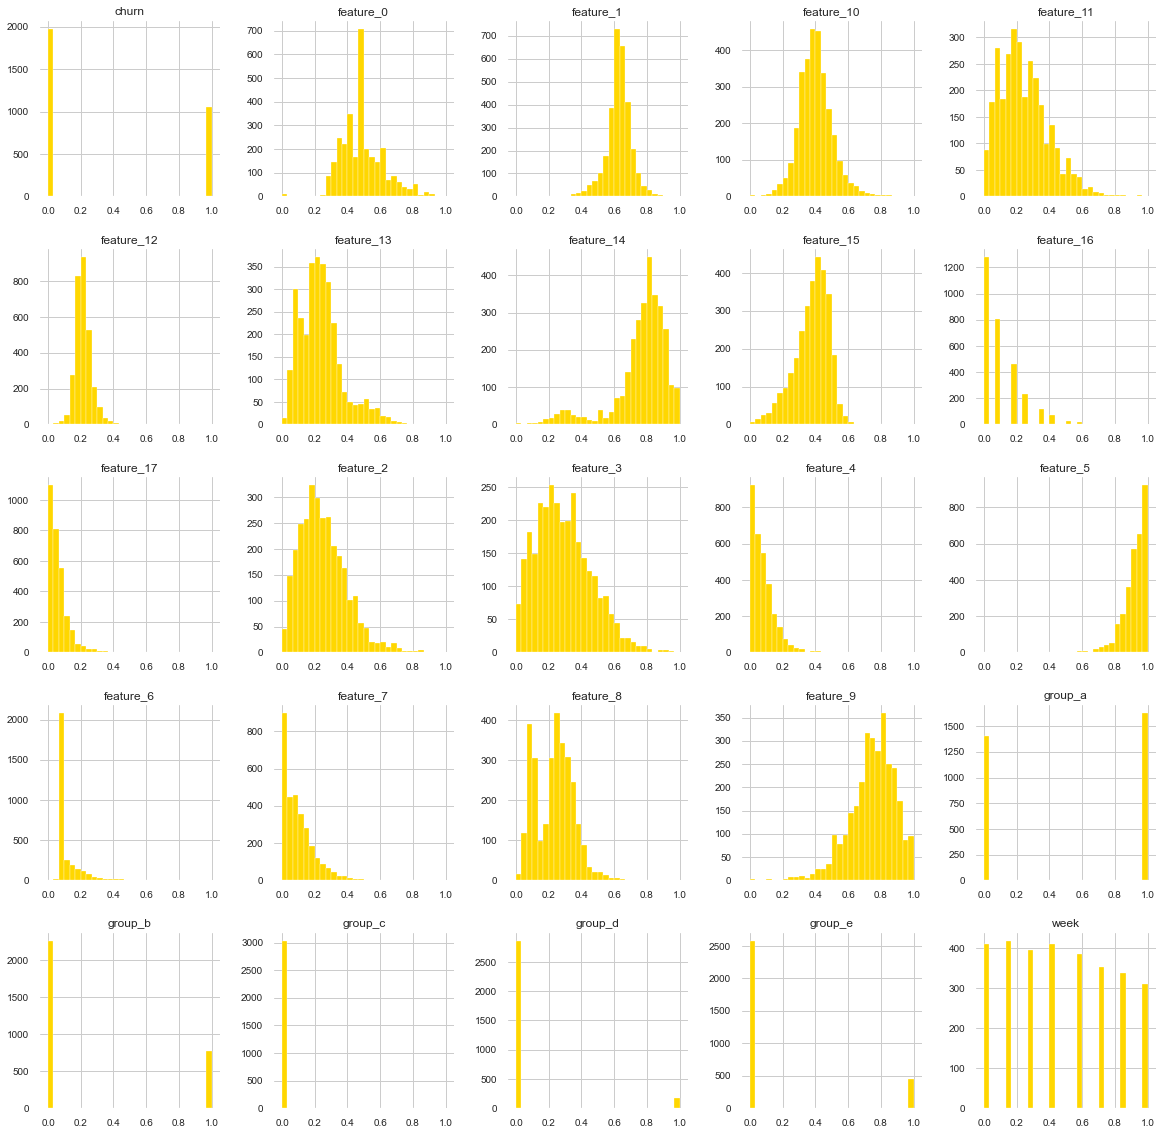

In [95]:
df_normalize.hist(figsize = (20,20), color = 'gold', bins=30)

- Normalization does not change the type of distribution, only the range, this must be the reason with has been beaten by Standarization for this use case

### Standarise Numerical Variables

- Features will be rescaled to have so that they’ll have the properties of a standard normal distribution with μ=0 and σ=1
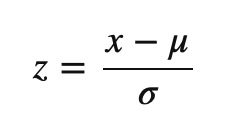

In [100]:
df_final_X.head()

feature_0  week  feature_1  feature_2  feature_3  feature_4  feature_5  \
0       33.0     2          6         34         38     0.0789     0.9211   
1       33.0     4         -1         42         37     0.0000     1.0000   
2       33.0     5         24         41         43     0.0233     0.9767   
3       33.0     6        -22         65         66     0.0606     0.9394   
4       35.0     2          9         33         27     0.0741     0.9259   

   feature_6  feature_7  feature_8  feature_9  feature_10  feature_11  \
0   140.4737     0.1316  2162.4737     0.7632    7.340776           8   
1   135.5946     0.0811  2097.4054     0.9459   11.883784          19   
2   131.0930     0.0233  2043.8837     0.9302    7.072100          16   
3   120.1515     0.0000  2124.2727     0.7727    7.356567          33   
4   100.0000     0.0370  4075.7407     0.8889    8.501233           5   

   feature_12  feature_13  feature_14  feature_15  feature_16  feature_17  \
0   20.208158    5.236316      0.8158   43.384804           1          19   
1   18.855405    5.689459      0.8919   35.078042           3          11   
2   18.925116    5.138605      0.9302   31.455285           1          10   
3   18.259697    4.704394      0.7879   34.252991           1          30   
4   26.863704    4.828519      0.8889   46.478114           1           4   

   group_a  group_b  group_c  group_d  group_e  
0        0        1        0        0        0  
1        0        1        0        0        0  
2        0        1        0        0        0  
3        0        1        0        0        0  
4        1        0        0        0        0

In [101]:
scaler = StandardScaler()
scaler.fit(df_final_X)
df_final_scaled_X = scaler.transform(df_final_X)

In [102]:
df_final_scaled_X = pd.DataFrame(df_final_scaled_X, columns = df_final_X.columns)
df_final_scaled_X.head()

feature_0      week  feature_1  feature_2  feature_3  feature_4  feature_5  \
0   0.003371 -0.573883   0.543258  -0.394797  -0.538646   0.027161  -0.027175   
1   0.003371  0.314322   0.115651  -0.058196  -0.571339  -1.067477   1.067461   
2   0.003371  0.758424   1.642819  -0.100271  -0.375183  -0.744219   0.744204   
3   0.003371  1.202526  -1.167171   0.909531   0.376750  -0.226729   0.226714   
4   0.240812 -0.573883   0.726518  -0.436872  -0.898266  -0.039433   0.039419   

   feature_6  feature_7  feature_8  feature_9  feature_10  feature_11  \
0   4.062825   1.006741  -1.470396   0.109689   -1.326813   -1.002491   
1   3.508887   0.232454  -1.520527   1.428141    1.127682   -0.102507   
2   2.997806  -0.653760  -1.561763   1.314842   -1.471973   -0.347957   
3   1.755585  -1.011006  -1.499828   0.178246   -1.318282    1.042926   
4  -0.532276  -0.443706   0.003661   1.016801   -0.699842   -1.247941   

   feature_12  feature_13  feature_14  feature_15  feature_16  feature_17  \
0    0.053510   -0.058104    0.304943   -1.444993   -0.811506    0.445223   
1   -0.359431    0.403426    0.757172   -1.890224    0.532856   -0.198832   
2   -0.338151   -0.157624    0.984771   -2.084399   -0.811506   -0.279339   
3   -0.541278   -0.599871    0.139146   -1.934446   -0.811506    1.330798   
4    2.085184   -0.473449    0.739344   -1.279195   -0.811506   -0.762380   

    group_a   group_b   group_c   group_d  group_e  
0 -1.077365  1.708331 -0.018185 -0.246291 -0.42022  
1 -1.077365  1.708331 -0.018185 -0.246291 -0.42022  
2 -1.077365  1.708331 -0.018185 -0.246291 -0.42022  
3 -1.077365  1.708331 -0.018185 -0.246291 -0.42022  
4  0.928191 -0.585367 -0.018185 -0.246291 -0.42022

array([[<AxesSubplot:title={'center':'feature_0'}>,
        <AxesSubplot:title={'center':'feature_1'}>,
        <AxesSubplot:title={'center':'feature_10'}>,
        <AxesSubplot:title={'center':'feature_11'}>,
        <AxesSubplot:title={'center':'feature_12'}>],
       [<AxesSubplot:title={'center':'feature_13'}>,
        <AxesSubplot:title={'center':'feature_14'}>,
        <AxesSubplot:title={'center':'feature_15'}>,
        <AxesSubplot:title={'center':'feature_16'}>,
        <AxesSubplot:title={'center':'feature_17'}>],
       [<AxesSubplot:title={'center':'feature_2'}>,
        <AxesSubplot:title={'center':'feature_3'}>,
        <AxesSubplot:title={'center':'feature_4'}>,
        <AxesSubplot:title={'center':'feature_5'}>,
        <AxesSubplot:title={'center':'feature_6'}>],
       [<AxesSubplot:title={'center':'feature_7'}>,
        <AxesSubplot:title={'center':'feature_8'}>,
        <AxesSubplot:title={'center':'feature_9'}>,
        <AxesSubplot:title={'center':'group_a'}>,
   

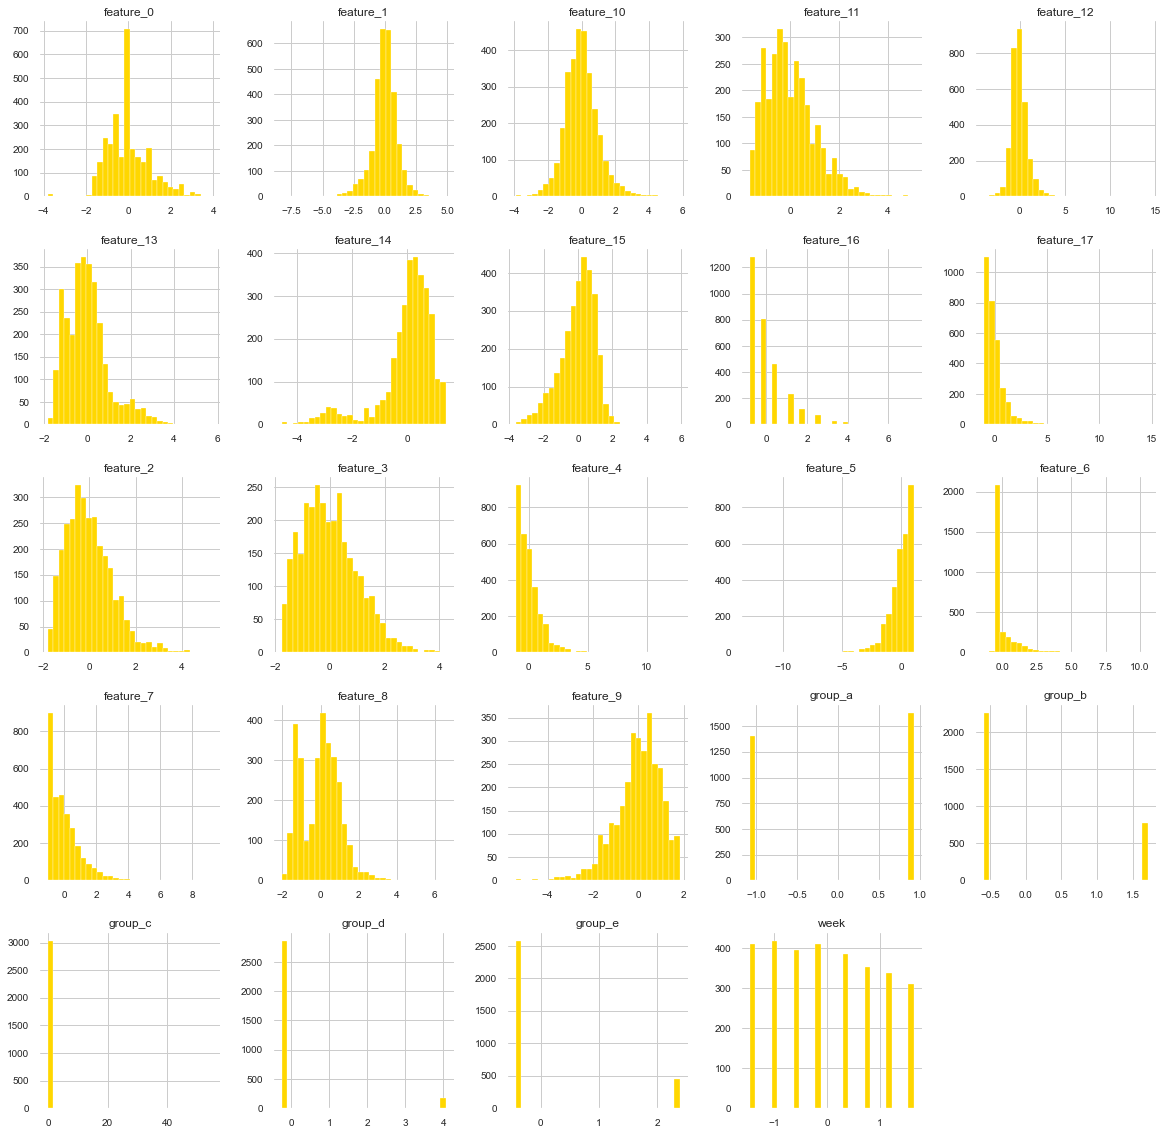

In [104]:
df_final_scaled_X.hist(figsize = (20,20), color = 'gold', bins=30)

### Log transformation

- Technique used to stabilize variance, make the data more normal distribution-like
- The Yeo–Johnson transformation allows also for zero and negative values of y. Lambda  can be any real number, where lambda=1 produces the identity transformation. The transformation law reads:

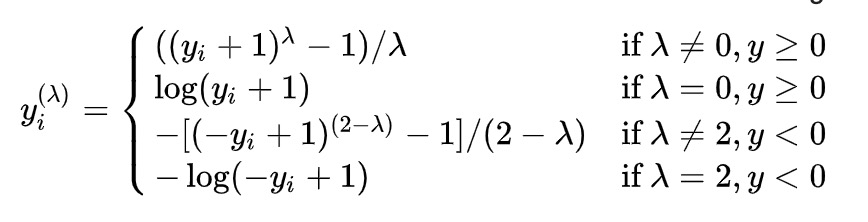

In [106]:
# Applying log tranformation
pt = PowerTransformer(method='yeo-johnson')
X = df_final_scaled_X.values
data = pt.fit_transform(X)


# convert the array back to a dataframe
df_final_scaled_log_X = pd.DataFrame(data, columns = df_final_scaled_X.columns)
df_final_scaled_log_X.head()


feature_0      week  feature_1  feature_2  feature_3  feature_4  feature_5  \
0   0.104565 -0.550565   0.512729  -0.281437  -0.468962   0.314791  -0.314812   
1   0.104565  0.349596   0.056528   0.108960  -0.508820  -1.471011   1.470987   
2   0.104565  0.774372   1.787558   0.063067  -0.274637  -0.833740   0.833714   
3   0.104565  1.187574  -1.152615   0.977493   0.500623  -0.003367   0.003343   
4   0.339365 -0.550565   0.716016  -0.333805  -0.924415   0.237212  -0.237234   

   feature_6  feature_7  feature_8  feature_9  feature_10  feature_11  \
0   1.957507   1.141284  -1.562339  -0.028070   -1.415454   -1.098159   
1   1.929026   0.546380  -1.621547   1.699251    1.118044    0.060120   
2   1.894772  -0.654260  -1.670402   1.530661   -1.591353   -0.222753   
3   1.749674  -1.346614  -1.597075   0.047331   -1.405185    1.074912   
4  -0.828166  -0.302261   0.064966   1.103615   -0.682964   -1.466660   

   feature_12  feature_13  feature_14  feature_15  feature_16  feature_17  \
0    0.206347    0.134430    0.099333   -1.367904   -1.053543    0.854090   
1   -0.275598    0.590527    0.917630   -1.687446    0.908320    0.088947   
2   -0.248875    0.020894    1.415712   -1.821017   -1.053543   -0.046667   
3   -0.511650   -0.550231   -0.143003   -1.718150   -1.053543    1.431900   
4    1.847636   -0.376364    0.881043   -1.243489   -1.053543   -1.075770   

    group_a   group_b   group_c   group_d  group_e  
0 -1.077365  1.708331 -0.018185 -0.246291 -0.42022  
1 -1.077365  1.708331 -0.018185 -0.246291 -0.42022  
2 -1.077365  1.708331 -0.018185 -0.246291 -0.42022  
3 -1.077365  1.708331 -0.018185 -0.246291 -0.42022  
4  0.928191 -0.585367 -0.018185 -0.246291 -0.42022

/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:3

array([[<AxesSubplot:title={'center':'feature_0'}>,
        <AxesSubplot:title={'center':'feature_1'}>,
        <AxesSubplot:title={'center':'feature_10'}>,
        <AxesSubplot:title={'center':'feature_11'}>,
        <AxesSubplot:title={'center':'feature_12'}>],
       [<AxesSubplot:title={'center':'feature_13'}>,
        <AxesSubplot:title={'center':'feature_14'}>,
        <AxesSubplot:title={'center':'feature_15'}>,
        <AxesSubplot:title={'center':'feature_16'}>,
        <AxesSubplot:title={'center':'feature_17'}>],
       [<AxesSubplot:title={'center':'feature_2'}>,
        <AxesSubplot:title={'center':'feature_3'}>,
        <AxesSubplot:title={'center':'feature_4'}>,
        <AxesSubplot:title={'center':'feature_5'}>,
        <AxesSubplot:title={'center':'feature_6'}>],
       [<AxesSubplot:title={'center':'feature_7'}>,
        <AxesSubplot:title={'center':'feature_8'}>,
        <AxesSubplot:title={'center':'feature_9'}>,
        <AxesSubplot:title={'center':'group_a'}>,
   

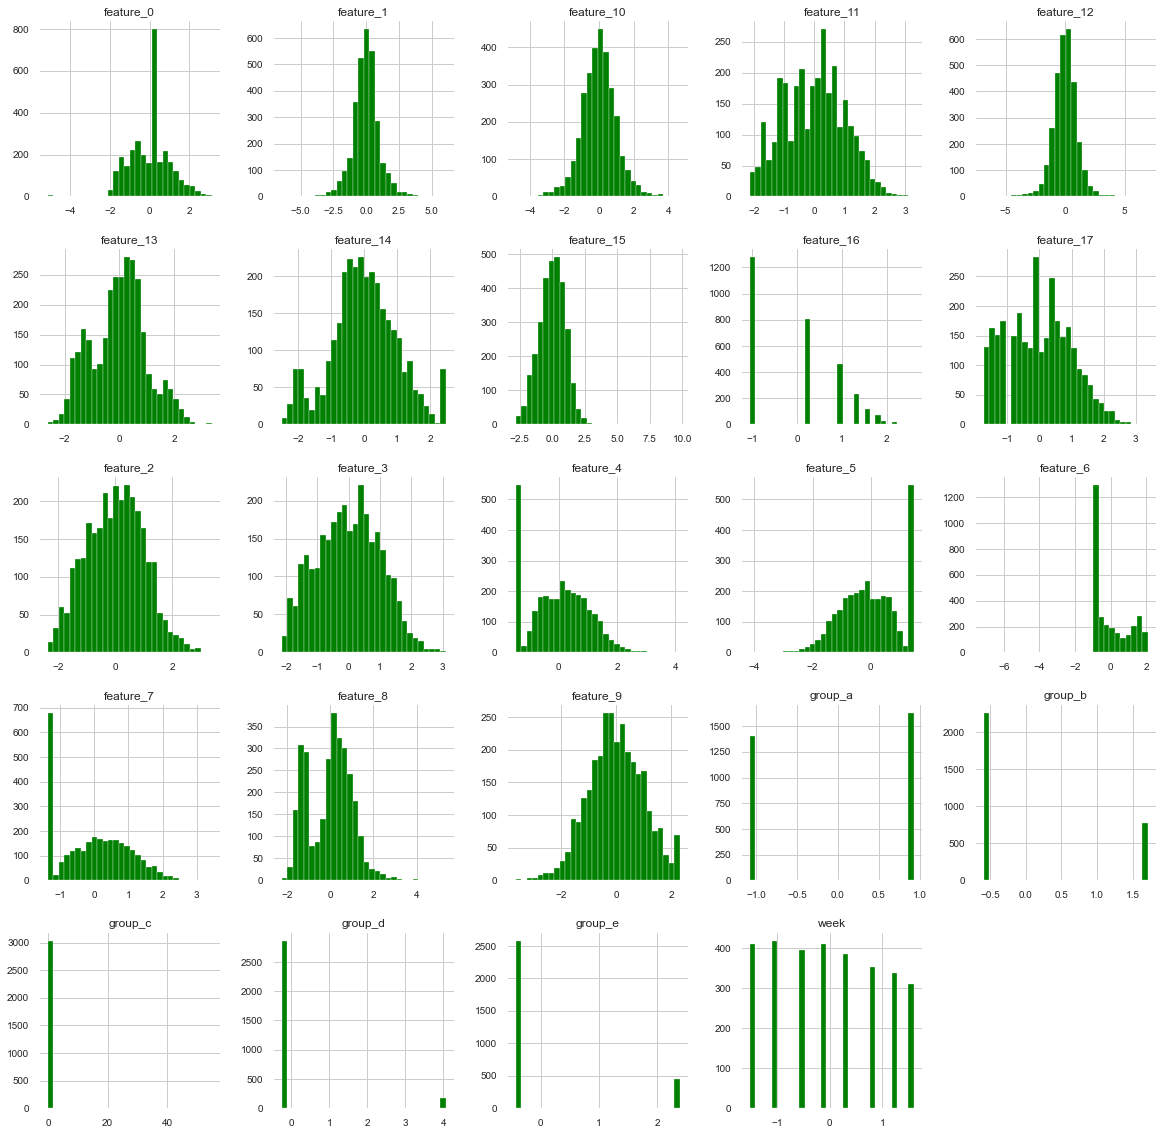

In [107]:
df_final_scaled_log_X.hist(figsize = (20,20), color = 'green', bins = 30)

- As it can be seen, now the features have distributions that are closer to be Normal. 

#### Linear correlation with Pearson’s correlation coefficient

- After changing data distribution, new correlations might appear, so it is needed to check this point again

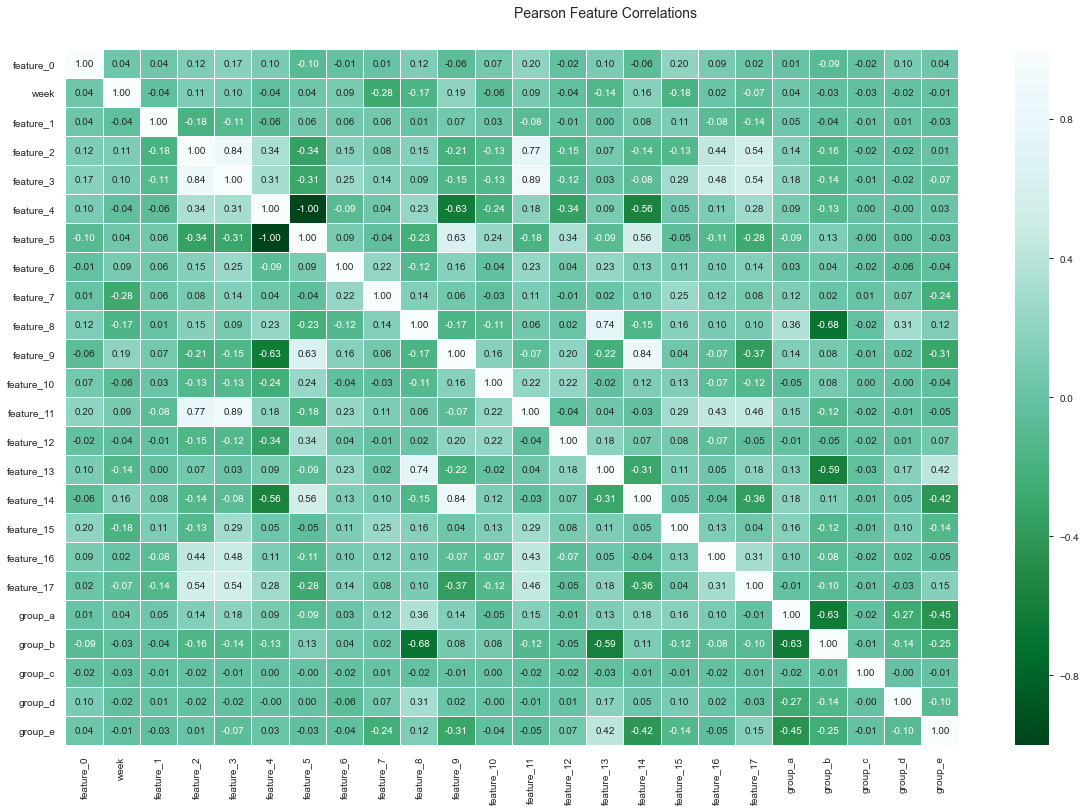

In [109]:
f, ax = plt.subplots(figsize=(20,12))
corr = df_final_scaled_log_X.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="BuGn_r",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Pearson Feature Correlations', fontsize=14)


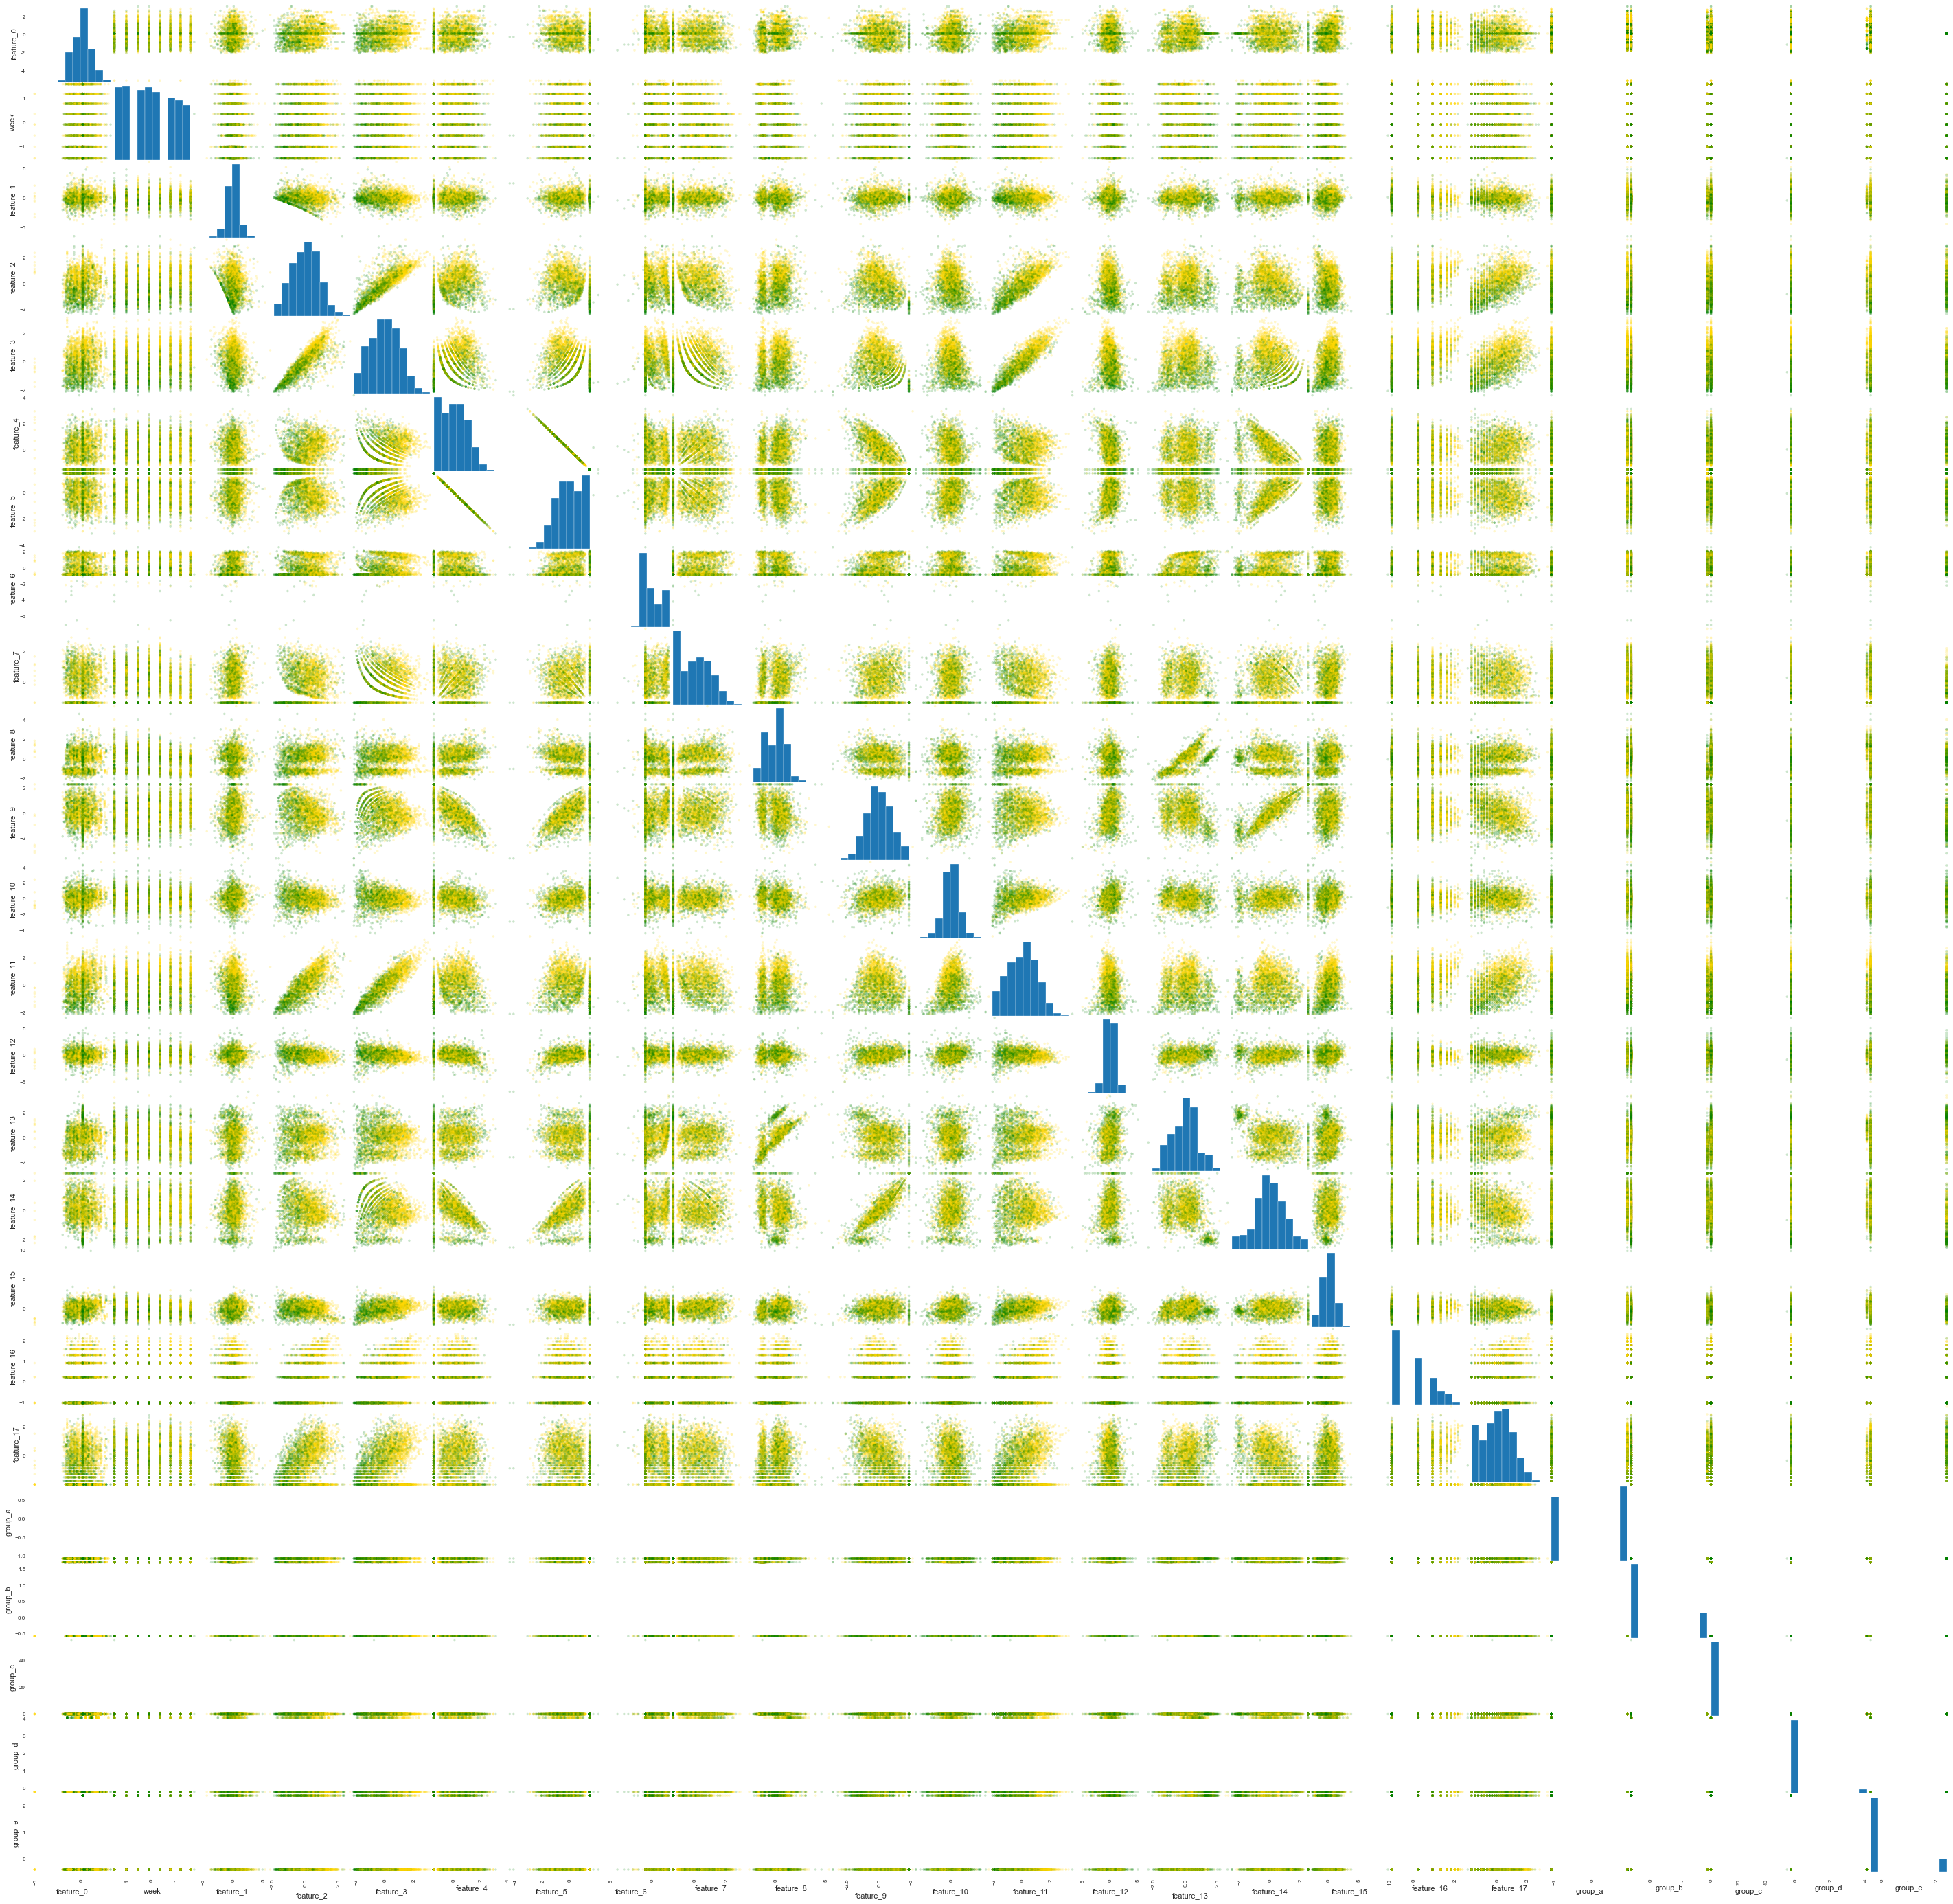

In [110]:
grad_colors = ['green' if ix else 'gold' for ix in df['churn']]

scatter_matrix(df_final_scaled_log_X[df_final_scaled_log_X.columns], 
               alpha=0.2, figsize=(50,50), diagonal='hist', c = grad_colors)
plt.show()

#### No Linear correlation with Spearman’s rank coefficient 


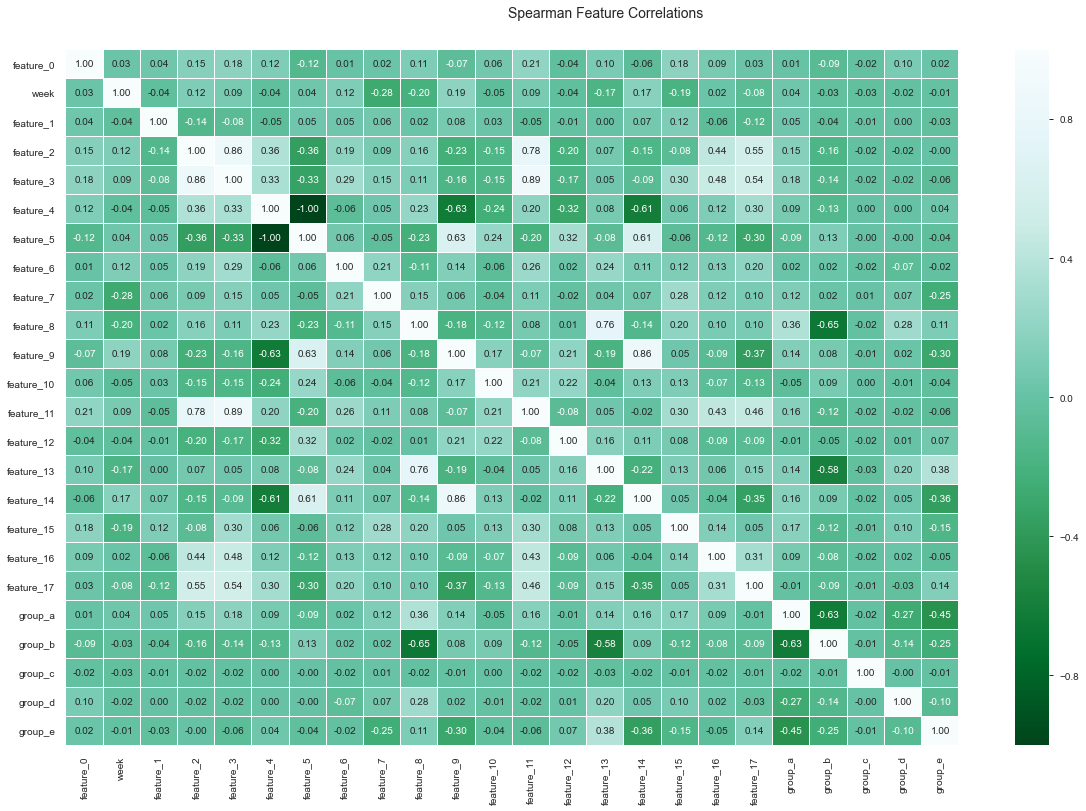

In [111]:
f, ax = plt.subplots(figsize=(20,12))
corr = df_final_scaled_log_X.corr(method='spearman')
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="BuGn_r",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Spearman Feature Correlations', fontsize=14)

- Correlation values have some differences, however only feacture 4 will be dropped.

In [113]:
X_drop = df_final_scaled_log_X.drop(['feature_4'], axis=1)
X_drop.shape

(3025, 23)

### Recursive Feature Selection (RFE)

- After changing feature distribution and standarisation, it is needed to implement a more integral technique that consider the target variable to see which features add value to the predictions. 

- **RFE** repeatedly constructs a model and chooses either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. It will be used to select features by recursively considering smaller and smaller sets of features.



In [120]:
df_rfe_X= X_drop.copy()
y=df_final_y.copy()
data_final_vars = df_rfe_X.columns.values.tolist()

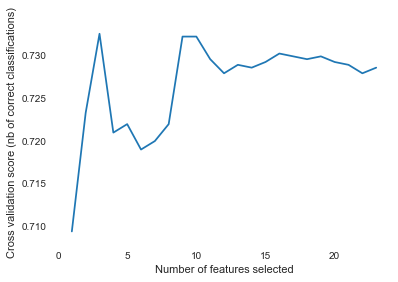

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
Optimal number of features : 3
[False False  True  True  True False False False False False False False
 False False False False False False False False False False False]
[ 6  8  1  1  1  7  5 11 16 18 15 14 20  2 17 13 12 21  4  9 19  3 10]


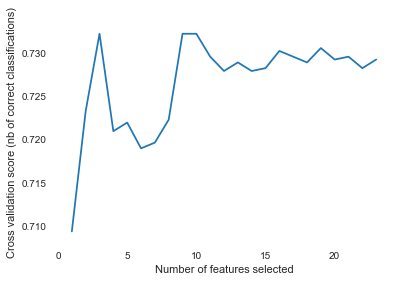

SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
Optimal number of features : 3
[False False  True  True  True False False False False False False False
 False False False False False False False False False False False]
[ 6  8  1  1  1  7  5 11 16 18 15 14 20  2 17 13 12 21  4  9 19  3 10]


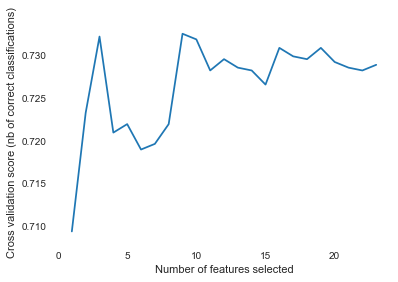

SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
Optimal number of features : 9
[ True False  True  True  True  True  True False False False False False
 False  True False False False False  True False False  True False]
[ 1  2  1  1  1  1  1  5 10 12  9  8 14  1 11  7  6 15  1  3 13  1  4]


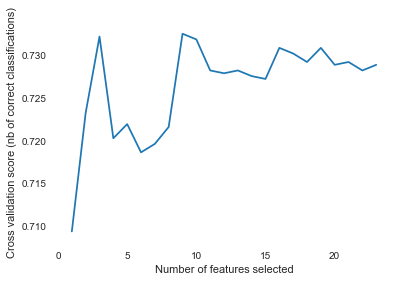

SVC(C=4, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
Optimal number of features : 9
[ True False  True  True  True  True  True False False False False False
 False  True False False False False  True False False  True False]
[ 1  2  1  1  1  1  1  5 10 12  9  8 14  1 11  7  6 15  1  3 13  1  4]


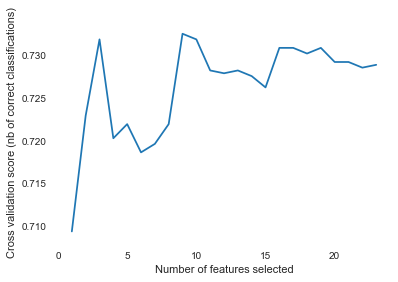

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
Optimal number of features : 9
[ True False  True  True  True  True  True False False False False False
 False  True False False False False  True False False  True False]
[ 1  2  1  1  1  1  1  5 10 12  9  8 14  1 11  7  6 15  1  3 13  1  4]


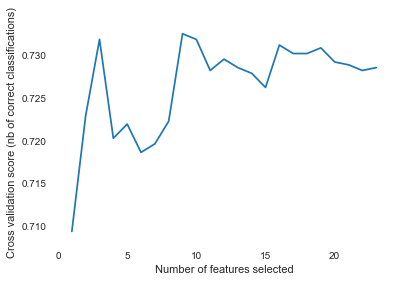

SVC(C=6, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
Optimal number of features : 9
[ True False  True  True  True  True  True False False False False False
 False  True False False False False  True False False  True False]
[ 1  2  1  1  1  1  1  5 10 12  9  8 14  1 11  7  6 15  1  3 13  1  4]


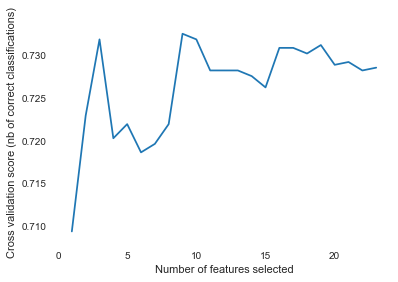

SVC(C=7, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
Optimal number of features : 9
[ True False  True  True  True  True  True False False False False False
 False  True False False False False  True False False  True False]
[ 1  2  1  1  1  1  1  5 10 12  9  8 14  1 11  7  6 15  1  3 13  1  4]


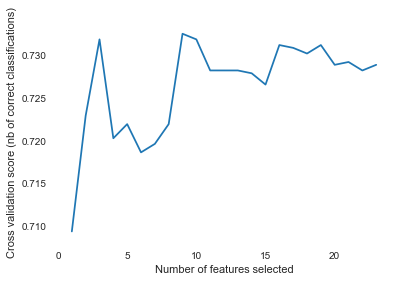

SVC(C=8, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
Optimal number of features : 9
[ True False  True  True  True  True  True False False False False False
 False  True False False False False  True False False  True False]
[ 1  2  1  1  1  1  1  5 10 12  9  8 14  1 11  7  6 15  1  3 13  1  4]


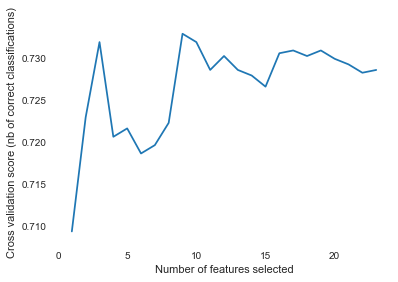

SVC(C=9, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
Optimal number of features : 9
[ True False  True  True  True  True  True False False False False False
 False  True False False False False  True False False  True False]
[ 1  2  1  1  1  1  1  5 10 12  9  8 14  1 11  7  6 15  1  3 13  1  4]


In [121]:
C_range=list(range(1,10))
for c in C_range:

    svc = SVC(kernel="linear", C=c)
    # The "accuracy" scoring is proportional to the number of correct
    # classifications
    X = df_rfe_X
    rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(4),
                  scoring='accuracy')
    rfecv.fit(X, y.values.ravel())

    # Plot number of features VS. cross-validation scores
    plt.figure()
    plt.xlabel("Number of features selected")
    plt.ylabel("Cross validation score (nb of correct classifications)")
    plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
    plt.show()

    print(rfecv.estimator)
    print("Optimal number of features : %d" % rfecv.n_features_)
    print(rfecv.support_)
    print(rfecv.ranking_)

- The best perfomance appears with 3 and 9 features (for C values of SVC 2 and 3). In this case, it will be selected 9 features to capture more variability of the use case

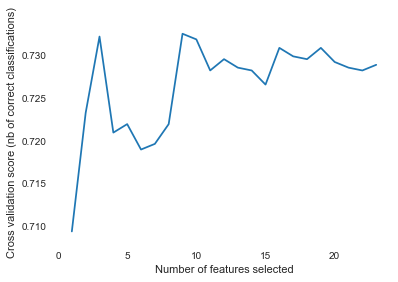

SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)
Optimal number of features : 9
[ True False  True  True  True  True  True False False False False False
 False  True False False False False  True False False  True False]
[ 1  2  1  1  1  1  1  5 10 12  9  8 14  1 11  7  6 15  1  3 13  1  4]


In [122]:
#Applying RFE with C=3 to get 9 features
svc = SVC(kernel="linear", C=3, random_state = 0 )
# The "accuracy" scoring is proportional to the number of correct classifications

rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(4),
              scoring='accuracy')
rfecv.fit(df_rfe_X, y.values.ravel())

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

print(rfecv.estimator)
print("Optimal number of features : %d" % rfecv.n_features_)
print(rfecv.support_)
print(rfecv.ranking_)

In [353]:
#Ranking features and plotting which columns will be kept
cols = {'Variable': df_rfe_X.columns,
        'Keep': rfecv.support_.tolist(),
        'Ranking': rfecv.ranking_}

selection_df = pd.DataFrame(cols, columns = ['Variable', 'Keep', 'Ranking'])
selection_df.sort_values(by='Ranking', ascending = True)

Variable   Keep  Ranking
0    feature_0   True        1
2    feature_1   True        1
3    feature_2   True        1
4    feature_3   True        1
5    feature_5   True        1
6    feature_6   True        1
18     group_a   True        1
13  feature_13   True        1
21     group_d   True        1
1         week  False        2
19     group_b  False        3
22     group_e  False        4
7    feature_7  False        5
16  feature_16  False        6
15  feature_15  False        7
11  feature_11  False        8
10  feature_10  False        9
8    feature_8  False       10
14  feature_14  False       11
9    feature_9  False       12
20     group_c  False       13
12  feature_12  False       14
17  feature_17  False       15

- It is interesting to see that week does not add so much value and from groups, group_a and group_d have been chosen. However, week and the rest of the groups are the next ones in the rank.
- Finally, group_c ranks very badly since it only had one data sample. 

In [354]:
# Creating an array with selected features
selected_features = selection_df[selection_df['Keep'] == True].Variable.tolist()
selected_features

['feature_0',
 'feature_1',
 'feature_2',
 'feature_3',
 'feature_5',
 'feature_6',
 'feature_13',
 'group_a',
 'group_d']

In [355]:
X = df_rfe_X[selected_features]
X.tail()

feature_0  feature_1  feature_2  feature_3  feature_5  feature_6  \
3020   0.101121   0.512729  -0.663410  -0.312825  -0.550640  -0.183594   
3021   0.101121   0.119970  -0.333805  -0.429429   0.775668  -0.828166   
3022   0.101121  -0.714095  -0.333805  -0.199310  -0.464007   1.119688   
3023   0.101121  -0.770091  -1.141323  -1.277643   0.161216  -0.337756   
3024   0.101121   0.647785  -2.143733  -1.887172   1.470987   2.031743   

      feature_13   group_a   group_d  
3020    1.788308 -1.077365 -0.246291  
3021    1.962087 -1.077365 -0.246291  
3022    2.332448 -1.077365 -0.246291  
3023    2.219105 -1.077365 -0.246291  
3024    2.500780 -1.077365 -0.246291

# Building Predictive Models

- For this business case where it is needed to perform a binary classification, it is going to be used three different models that will compete agains each other. The models are:

     **- Logistic Regression**
     
     **- Support Vector Machine**
     
     **- Random Forest**
     
     
- Each model has its specitifies and assupmtions but they will be work out in several iterations

## Preparing data input

In [135]:
X.head()

feature_0  feature_1  feature_2  feature_3  feature_5  feature_6  \
0   0.104565   0.512729  -0.281437  -0.468962  -0.314812   1.957507   
1   0.104565   0.056528   0.108960  -0.508820   1.470987   1.929026   
2   0.104565   1.787558   0.063067  -0.274637   0.833714   1.894772   
3   0.104565  -1.152615   0.977493   0.500623   0.003343   1.749674   
4   0.339365   0.716016  -0.333805  -0.924415  -0.237234  -0.828166   

   feature_13   group_a   group_d  
0    0.134430 -1.077365 -0.246291  
1    0.590527 -1.077365 -0.246291  
2    0.020894 -1.077365 -0.246291  
3   -0.550231 -1.077365 -0.246291  
4   -0.376364  0.928191 -0.246291

In [136]:
y.head()

churn
0      1
1      1
2      1
3      1
4      0

In [137]:
#getting the values for training the model
X = X.values
y = y.values.ravel()

## Split Dataset Before Cross Validation

In [139]:
# Split data before cross validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Logistic Regression

### Cross Validation

- In order to avoid overfitting and selection bias and to assure how the model will generalize to an unknown dataset, it is needed to apply cross-validation with different splits according to each model.

Mean Accuracy Logistic Regression and Cross Validation:
0.7342183440167578
Mean Accuracy Logistic Regression and Cross Validation:
0.7272762728040231
Mean Accuracy Logistic Regression and Cross Validation:
0.7259558931454573
Mean Accuracy Logistic Regression and Cross Validation:
0.7285914431298639
Mean Accuracy Logistic Regression and Cross Validation:
0.7163641364136414
Mean Accuracy Logistic Regression and Cross Validation:
0.7196579265693871
Mean Accuracy Logistic Regression and Cross Validation:
0.7176903156454608
Mean Accuracy Logistic Regression and Cross Validation:
0.7166511538206477
Mean Accuracy Logistic Regression and Cross Validation:
0.7219267251360456
Mean Accuracy Logistic Regression and Cross Validation:
0.72


Text(0, 0.5, 'Cross-Validated Accuracy')

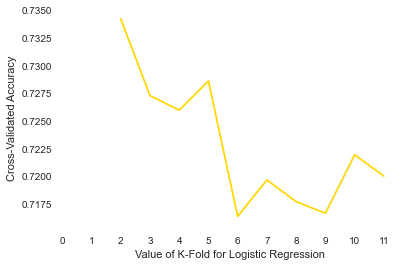

In [140]:
# In order to perform the most efficient split from the dataset, it is calculated the accuracy with different number of splits
cv = list(range(2,12))
cross_validation_score = []

for i in cv:
    svc=LogisticRegression(solver='liblinear', max_iter=3000)
    svc.fit(X_train,y_train)
    y_pred=svc.predict(X_test)
    scores = cross_val_score(svc, X, y, cv=i, scoring='accuracy') 
    print('Mean Accuracy Logistic Regression and Cross Validation:')
    print(scores.mean())
    cross_validation_score.append(scores.mean())

plt.plot(cv,cross_validation_score, color = 'gold')
plt.xticks(np.arange(0,12,1))
plt.xlabel('Value of K-Fold for Logistic Regression')
plt.ylabel('Cross-Validated Accuracy')


- It seems that a reasonable value for cross validation would be around 3 splits

### Grid Search for Logistic Regression

- This is a technique to apply differnt values to the reguralization hyperparameter in order to see which parameter provides the best performance

In [144]:
# Analysis of several parameters
param_lr = {
# 'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]
'Cs' : np.arange(50, 90, 5)
 #'Cs'=list(np.power(10.0, np.arange(-10, 10)))    
}
gsearch_lr = GridSearchCV(estimator = LogisticRegressionCV(random_state = 42,penalty = 'l1', solver = 'liblinear', cv=3), 
param_grid = param_lr, scoring='roc_auc',iid=False, cv=3)
gsearch_lr.fit(X_train, y_train)
gsearch_lr.cv_results_, gsearch_lr.best_params_, gsearch_lr.best_score_

({'mean_fit_time': array([0.23250747, 0.25412965, 0.27968033, 0.29976209, 0.31298614,
         0.33597549, 0.40268826, 0.36747432]),
  'std_fit_time': array([0.00963217, 0.01009571, 0.00939598, 0.00241955, 0.00410115,
         0.01494008, 0.0785584 , 0.02009012]),
  'mean_score_time': array([0.00105055, 0.00105333, 0.00119027, 0.00112565, 0.00095089,
         0.00105953, 0.00105135, 0.00102162]),
  'std_score_time': array([9.03234836e-05, 1.09466587e-04, 8.87622547e-05, 1.94567123e-04,
         2.78901053e-05, 1.02973276e-04, 2.83443049e-05, 5.90537361e-05]),
  'param_Cs': masked_array(data=[50, 55, 60, 65, 70, 75, 80, 85],
               mask=[False, False, False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'Cs': 50},
   {'Cs': 55},
   {'Cs': 60},
   {'Cs': 65},
   {'Cs': 70},
   {'Cs': 75},
   {'Cs': 80},
   {'Cs': 85}],
  'split0_test_score': array([0.76540976, 0.7653748 , 0.76530487, 0.76532236, 0.76532236,
         0.7652

In [145]:
# Running logistic regression with L1 (Lasso)
lr = LogisticRegressionCV(Cs=75, penalty='l1',random_state = 42, solver = 'liblinear', cv=3)
lr.fit(X_train, y_train)

LogisticRegressionCV(Cs=75, class_weight=None, cv=3, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='warn', n_jobs=None,
                     penalty='l1', random_state=42, refit=True, scoring=None,
                     solver='liblinear', tol=0.0001, verbose=0)

- Lasso regularization shrinks the less important feature’s coefficient to zero thus, removing some feature altogether. This way over-fitting is avoided

### Model Evaluation

- Although the common way to evaluate models is related to study **accuracy**. In terms of classification, it is needed to focus on the trade-off precision/recall that fit best the main goal and not so much in accuracy, especially with imbalanced classes. Thinking about how True Negative or False Positive affect the business case. Moreover, it is needed to compare the general perfomance of each model by evaluating ROC and AUC.

- Confusion Matrix is the tool to understand how well the datapoints are getting classified. 
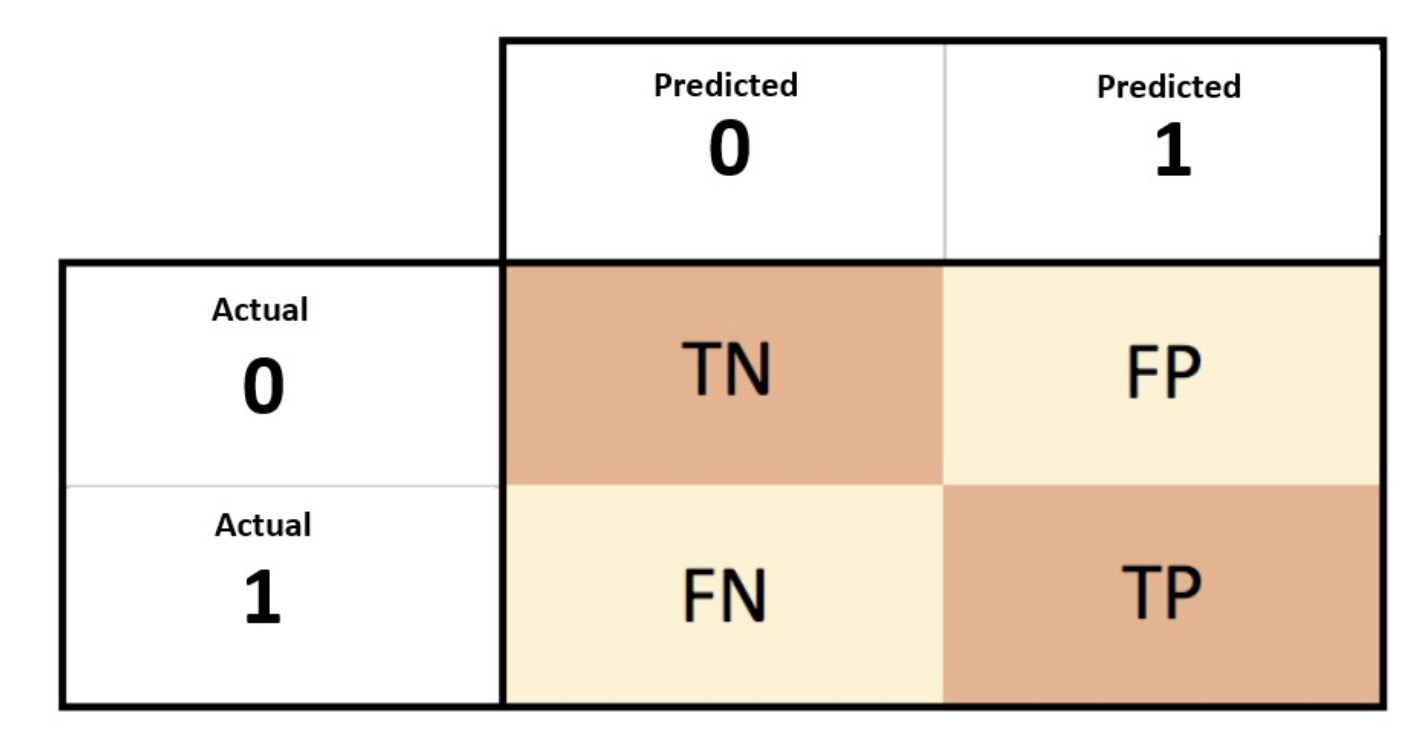

In [147]:
#Obtaining the prectited labls for the test split
y_pred = lr.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lr.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.74


In [156]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
print (confusion_matrix)
print ('True Negative: ' + str(confusion_matrix[0,0]))
print ('True Positive: ' + str(confusion_matrix[1,1]))
print ('False Negative: ' + str(confusion_matrix[1,0]))
print ('False Positive: ' + str(confusion_matrix[0,1]))
print ('Total Number of Values: ' + str(confusion_matrix.sum()))

[[524  84]
 [148 152]]
True Negative: 524
True Positive: 152
False Negative: 148
False Positive: 84
Total Number of Values: 908


In [149]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       608
           1       0.64      0.51      0.57       300

    accuracy                           0.74       908
   macro avg       0.71      0.68      0.69       908
weighted avg       0.73      0.74      0.74       908



#### Thresold Analysis

- The previous results are given by a 0.5 default threshold
- This section has a crucial business impact since it is the point where data science and business units must come to a point to decide how the  model should perform

In [151]:
class CustomThreshold(BaseEstimator, ClassifierMixin):
    """ Custom threshold wrapper for binary classification"""
    def __init__(self, base, threshold=0.5):
        self.base = base
        self.threshold = threshold
    def fit(self, *args, **kwargs):
        self.base.fit(*args, **kwargs)
        return self
    def predict(self, X):
        return (self.base.predict_proba(X)[:, 1] > self.threshold).astype(int)

clf = [CustomThreshold(lr, threshold) for threshold in np.arange(0,1.1,0.1)]
#clf = [CustomThreshold(lr, threshold) for threshold in[0.1]]
for model in clf:
    print(metrics.confusion_matrix(y_test, model.predict(X_test)))

[[  0 608]
 [  0 300]]
[[112 496]
 [  3 297]]
[[268 340]
 [ 27 273]]
[[387 221]
 [ 59 241]]
[[470 138]
 [111 189]]
[[524  84]
 [148 152]]
[[555  53]
 [185 115]]
[[589  19]
 [230  70]]
[[604   4]
 [268  32]]
[[608   0]
 [295   5]]
[[608   0]
 [300   0]]


In [158]:
clf = [CustomThreshold(lr, threshold) for threshold in[0.45]]
for model in clf:
    print(metrics.confusion_matrix(y_test, model.predict(X_test)))
    print(classification_report(y_test, model.predict(X_test)))

[[501 107]
 [128 172]]
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       608
           1       0.62      0.57      0.59       300

    accuracy                           0.74       908
   macro avg       0.71      0.70      0.70       908
weighted avg       0.74      0.74      0.74       908



Precision: ratio tp / (tp + fp) - ability of the classifier to not label a sample as positive if it is negative.

Recall: ratio tp / (tp + fn) - ability of the classifier to find all the positive samples.

f1-score: weighted mean of Precision and Recall (scores go from 0(worst) to 1(best)). 1 means recall and precision are equally important.

Support: number of occurrences of each class in y_test.

**Assumptions** 
- The business case is focused on the True Negative, those one that have not churned
- False Negative will have a huge impact on the busiiness since they were expected to work but finally did not so it might cause losses in revenue and transactions
- False Positive will affect the health of the marketplace since there might incur into disatisfied glovers that will not have so many rides as expected
- True negative is the focus since are those ones that keep working
- True positive are the ones that need to be consider since they might be unsatisfied and some business strategies might need to be implemented to have them back

- Since there is an imbalanced dataset, the thresold is place so False Negative has been reduced and at the same time the True Positives ones are larger. This way, we classify better the True Negatives since they are more commont in the classes. 
- This tradeoff of precision and recall must need to be aligned with the business impact

#### ROC - AUC

In [184]:
# Obtaining the probabilities for every data point of being classified as 1
lr_y_train_pred_proba = lr.predict_proba(X_train)[:,1]
lr_y_test_pred_proba = lr.predict_proba(X_test)[:,1]


Text(0.5, 0, 'False Positive Rate')

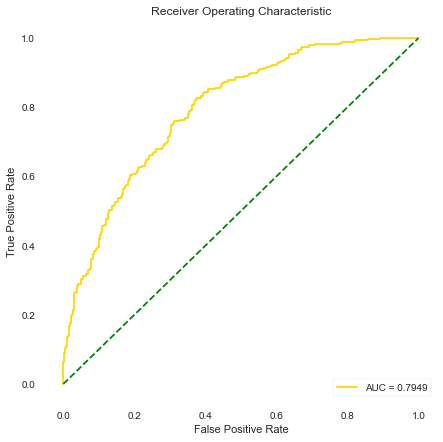

In [191]:
# Ploting ROC / AUC 
# This curve plot True Positive Rate vs False Positive Rate
auc_roc=metrics.roc_auc_score(y_test,lr_y_test_pred_proba)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, lr_y_test_pred_proba)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.figure(figsize=(7,7))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='gold',label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--', color = 'green')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [196]:
# Obtening the weight of every feature with coef_flatten
df_coeffs = pd.DataFrame(zip(selected_features, lr.coef_.flatten())).sort_values(by=[1], ascending=False)
df_coeffs.columns = ['feature', 'importance']
df_coeffs

feature  importance
6  feature_13    0.367765
0   feature_0   -0.099547
5   feature_6   -0.117403
4   feature_5   -0.134817
7     group_a   -0.201507
8     group_d   -0.216833
2   feature_2   -0.316558
1   feature_1   -0.447298
3   feature_3   -0.794208

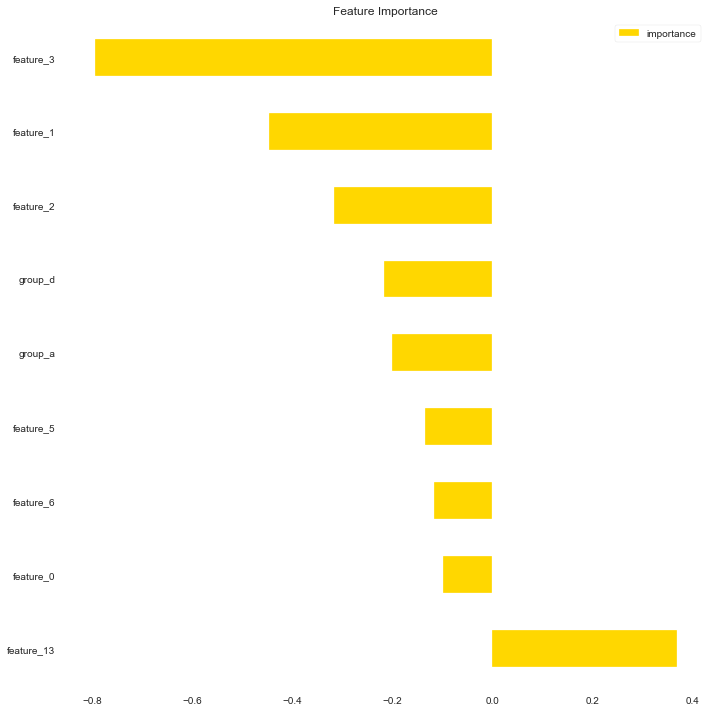

In [201]:
#Plotting the importance of every feature
ax = df_coeffs.plot.barh(figsize = (10,10),color = 'gold')
t = np.arange(X.shape[1])
ax.set_yticks(t)
ax.set_yticklabels(df_coeffs['feature'])
plt.title('Feature Importance')
plt.tight_layout()
plt.savefig('lr_feature_score')
plt.show()

### Model Complexity

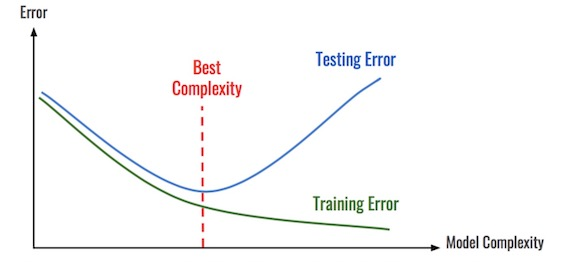
- By analysing the differences between AUC score for training and test, it can be conclude if the model complexity is the right one for this use case

In [198]:

def print_results(y_true , predprob):
    print ("AUC Score is:{} ".format(roc_auc_score(y_true, predprob)))

In [177]:
print("Training set scores of linear regression:")
print_results(y_train, lr_y_train_pred_proba)

Training set scores of linear regression:
AUC Score is:0.7854402108626942 


In [178]:
print("Test set scores of linear regression:")
print_results(y_test, lr_y_test_pred_proba)

Test set scores of linear regression:
AUC Score is:0.7949177631578948 


- The test set performs slightly better than the training set. This is due to the random way of initialize the models. Since the values are so close, it can be concluded that the complexity is fine for this use case

## Support Vector Machine

### Cross Validation for SVM

Mean Accuracy Support Vector Machine and Cross Validation:
0.7203318593354945
Mean Accuracy Support Vector Machine and Cross Validation:
0.7193417312966371
Mean Accuracy Support Vector Machine and Cross Validation:
0.7157076282736785
Mean Accuracy Support Vector Machine and Cross Validation:
0.7176637507218512
Mean Accuracy Support Vector Machine and Cross Validation:
0.7163608622767038
Mean Accuracy Support Vector Machine and Cross Validation:
0.7024245637733794
Mean Accuracy Support Vector Machine and Cross Validation:
0.7021453700213596
Mean Accuracy Support Vector Machine and Cross Validation:
0.7050444752358034
Mean Accuracy Support Vector Machine and Cross Validation:
0.7066542120978505
Mean Accuracy Support Vector Machine and Cross Validation:
0.7100826446280992


Text(0, 0.5, 'Cross-Validated Accuracy')

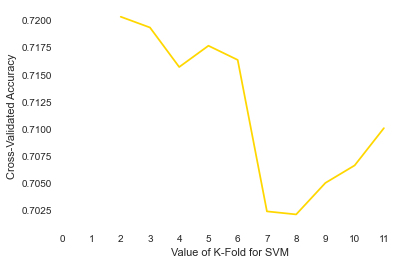

In [205]:
# In order to perform the most efficient split from the dataset, it is calculated the accuracy with different number of splits
cv = list(range(2,12))
cross_validation_score = []

for i in cv:
    svc= SVC(kernel="rbf", gamma = 'auto')
    svc.fit(X_train,y_train)
    y_pred=svc.predict(X_test)
    scores = cross_val_score(svc, X, y, cv=i, scoring='accuracy') 
    print('Mean Accuracy Support Vector Machine and Cross Validation:')
    print(scores.mean())
    cross_validation_score.append(scores.mean())

plt.plot(cv,cross_validation_score, color = 'gold')
plt.xticks(np.arange(0,12,1))
plt.xlabel('Value of K-Fold for SVM')
plt.ylabel('Cross-Validated Accuracy')


- The right number of splits can be 3 or 5

### Grid Search for Support Vector Machine

In [214]:
svm_model= SVC()

tuned_parameters = {
    'kernel':['rbf', 'linear', 'poly'],
    'C': np.arange(1,11,1),
    'gamma': np.arange(0.005,0.02,0.005), 
    #,'gamma':np.arange(0.03,0.7,0.1), 'C':(np.arange(0.1,1,0.1)) , 'kernel':['poly']
}

model_svm = GridSearchCV(svm_model, tuned_parameters,cv=5,scoring='roc_auc')


model_svm.fit(X_train, y_train)
print(model_svm.best_score_)
print(model_svm.best_params_)
y_pred= model_svm.predict(X_test)
print("Model accuracy= "+ str(metrics.accuracy_score(y_pred,y_test)))



0.7881585666976475
{'C': 10, 'gamma': 0.015, 'kernel': 'rbf'}
Model accuracy= 0.7599118942731278


In [242]:
# Running SVM with Kernel rbf, gamma 0.015 and regularization value C 10
svc = SVC(kernel='rbf', gamma=0.015, C=10, probability = True)
scores = cross_val_score(svc, X, y, cv=5, scoring='accuracy')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
svc

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.015, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

### Model Evaluation

- Although the common way to evaluate models is related to study **accuracy**. In terms of classification, it is needed to focus on the trade-off precision/recall that fit best the main goal and not so much in accuracy, especially with imbalanced classes. Thinking about how True Negative or False Positive affect the business case. Moreover, it is needed to compare the general perfomance of each model by evaluating ROC and AUC.

In [243]:
y_pred = svc.predict(X_test)
print('Accuracy of Support Vector Machine classifier on test set: {:.2f}'.format(svc.score(X_test, y_test)))

Accuracy of Support Vector Machine classifier on test set: 0.76


In [244]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
print (confusion_matrix)
print ('True Negative: ' + str(confusion_matrix[0,0]))
print ('True Positive: ' + str(confusion_matrix[1,1]))
print ('False Negative: ' + str(confusion_matrix[1,0]))
print ('False Positive: ' + str(confusion_matrix[0,1]))
print ('Total Number of Values: ' + str(confusion_matrix.sum()))

[[547  61]
 [157 143]]
True Negative: 547
True Positive: 143
False Negative: 157
False Positive: 61
Total Number of Values: 908


In [245]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.90      0.83       608
           1       0.70      0.48      0.57       300

    accuracy                           0.76       908
   macro avg       0.74      0.69      0.70       908
weighted avg       0.75      0.76      0.75       908



#### Thresold Analysis

In [246]:
clf = [CustomThreshold(svc, threshold) for threshold in np.arange(0,1.1,0.1)]
for model in clf:
    print(metrics.confusion_matrix(y_test, model.predict(X_test)))

[[  0 608]
 [  0 300]]
[[ 18 590]
 [  0 300]]
[[281 327]
 [ 29 271]]
[[434 174]
 [ 86 214]]
[[506 102]
 [127 173]]
[[548  60]
 [158 142]]
[[569  39]
 [187 113]]
[[588  20]
 [220  80]]
[[602   6]
 [247  53]]
[[608   0]
 [282  18]]
[[608   0]
 [300   0]]


In [249]:
clf = [CustomThreshold(svc, threshold) for threshold in[0.45]]
for model in clf:
    print(metrics.confusion_matrix(y_test, model.predict(X_test)))
    print(classification_report(y_test, model.predict(X_test)))

[[529  79]
 [142 158]]
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       608
           1       0.67      0.53      0.59       300

    accuracy                           0.76       908
   macro avg       0.73      0.70      0.71       908
weighted avg       0.75      0.76      0.75       908



- As in the previous case for LR, the thresold has been decressed to be more sure about the True Negative ones. 

In [251]:
#Obtaining probabilities for each data point
svc_y_test_pred_proba = svc.predict_proba(X_test)[:,1]
svc_y_train_pred_proba = svc.predict_proba(X_train)[:,1]

Text(0.5, 0, 'False Positive Rate')

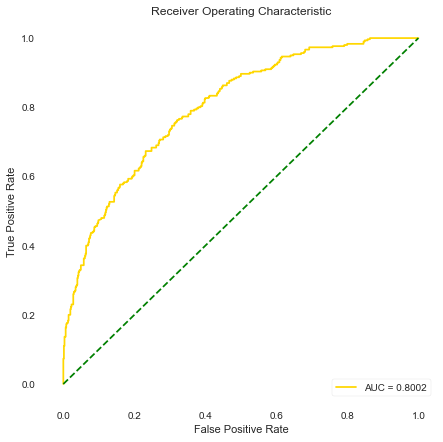

In [252]:
#plotting roc-auc for svm
auc_roc=metrics.roc_auc_score(y_test,svc_y_test_pred_proba)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, svc_y_test_pred_proba)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.figure(figsize=(7,7))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='gold',label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--', color = 'green')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### Model Complexity

In [253]:

def print_results(y_true , predprob):
    print ("AUC Score is:{} ".format(roc_auc_score(y_true, predprob)))

In [254]:
print("Training set scores of Support Vector Machine (Kernel rbf):")
print_results(y_train, svc_y_train_pred_proba)

Training set scores of Support Vector Machine (Kernel rbf):
AUC Score is:0.809986918271268 


In [255]:
print("Test set scores of Support Vector Machine (Kernel rbf):")
print_results(y_test, svc_y_test_pred_proba)

Test set scores of Support Vector Machine (Kernel rbf):
AUC Score is:0.8002165570175439 


- By evaluating the difference between training and test, it can be seen that they have similar values so the complexity of the model is the right one

## Random Forest

### Cross Validation for RF

Mean Accuracy Random Forest and Cross Validation:
0.6975185517402966
Mean Accuracy Random Forest and Cross Validation:
0.6905800834814709
Mean Accuracy Random Forest and Cross Validation:
0.6909143409308535
Mean Accuracy Random Forest and Cross Validation:
0.6961892432470218
Mean Accuracy Random Forest and Cross Validation:
0.7024791764890775
Mean Accuracy Random Forest and Cross Validation:
0.6862246467406335
Mean Accuracy Random Forest and Cross Validation:
0.674707005346847
Mean Accuracy Random Forest and Cross Validation:
0.6964593774334019
Mean Accuracy Random Forest and Cross Validation:
0.6914881387150837
Mean Accuracy Random Forest and Cross Validation:
0.6985123966942148


Text(0, 0.5, 'Cross-Validated Accuracy')

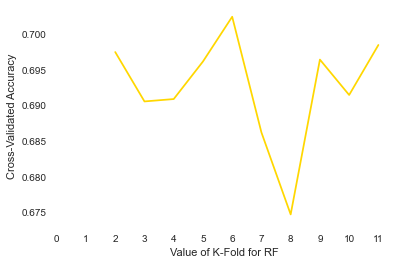

In [256]:
# In order to perform the most efficient split from the dataset, it is calculated the accuracy with different number of splits
cv = list(range(2,12))
cross_validation_score = []

for i in cv:
    svc= RandomForestClassifier(n_estimators = 30)
    svc.fit(X_train,y_train)
    y_pred=svc.predict(X_test)
    scores = cross_val_score(svc, X, y, cv=i, scoring='accuracy') 
    print('Mean Accuracy Random Forest and Cross Validation:')
    print(scores.mean())
    cross_validation_score.append(scores.mean())

plt.plot(cv,cross_validation_score, color = 'gold')
plt.xticks(np.arange(0,12,1))
plt.xlabel('Value of K-Fold for RF')
plt.ylabel('Cross-Validated Accuracy')

- It seems that 6 splits will be the best performance

### Grid Search for Random Forest

- Since the are several hyperparametes to be tunned, there will be several steps while tunning RF model

In [264]:
# Grid serch for RF.
param_rf = {
 'criterion':['gini','entropy'],
 'max_features':['auto','log2',0.2,None],
 'min_samples_leaf':[40,50,60]
}
gsearch_rf = GridSearchCV(estimator = RandomForestClassifier(n_jobs=-1, random_state = 42,n_estimators = 100), 
 param_grid = param_rf, scoring='roc_auc',n_jobs=2,iid=False, cv=4)
gsearch_rf.fit(X_train, y_train)
gsearch_rf.best_params_, gsearch_rf.best_score_

({'criterion': 'entropy', 'max_features': 'auto', 'min_samples_leaf': 40},
 0.7773639416665983)

In [265]:
# Tunning n_estimators
param_rf = {
 'n_estimators':np.arange(100,600,100)
}
gsearch_rf = GridSearchCV(estimator = RandomForestClassifier(n_jobs=-1, random_state = 42,
                                            min_samples_leaf = 40, criterion ='entropy', max_features = 'auto'), 
 param_grid = param_rf, scoring='roc_auc',n_jobs=2,iid=False, cv=4)
gsearch_rf.fit(X_train, y_train)
gsearch_rf.best_params_, gsearch_rf.best_score_

({'n_estimators': 1000}, 0.7786628483260362)

In [269]:
#Tunning n_estimators more accurately
param_rf = {
 'n_estimators':np.arange(500, 650,25)
}
gsearch_rf = GridSearchCV(estimator = RandomForestClassifier(n_jobs=-1, random_state = 42,
                                            min_samples_leaf = 40, criterion ='entropy', max_features = 'auto'), 
 param_grid = param_rf, scoring='roc_auc',n_jobs=2,iid=False, cv=4)
gsearch_rf.fit(X_train, y_train)
gsearch_rf.best_params_, gsearch_rf.best_score_

({'n_estimators': 625}, 0.7785540185445309)

In [270]:
#Training random forest with the parameters after tunning
rf = RandomForestClassifier(min_samples_leaf=1,criterion='entropy',max_features='auto',n_jobs=-1,random_state = 42,
                       n_estimators = 625)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=625,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

### Model Evaluation

In [271]:
#Accuracy
y_pred = rf.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(rf.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.75


In [274]:
#Obtaining probabilities for each data point
rf_y_test_pred_proba = svc.predict_proba(X_test)[:,1]
rf_y_train_pred_proba = svc.predict_proba(X_train)[:,1]

In [275]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
print (confusion_matrix)
print ('True Negative: ' + str(confusion_matrix[0,0]))
print ('True Positive: ' + str(confusion_matrix[1,1]))
print ('False Negative: ' + str(confusion_matrix[1,0]))
print ('False Positive: ' + str(confusion_matrix[0,1]))
print ('Total Number of Values: ' + str(confusion_matrix.sum()))

[[526  82]
 [145 155]]
True Negative: 526
True Positive: 155
False Negative: 145
False Positive: 82
Total Number of Values: 908


In [276]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       608
           1       0.65      0.52      0.58       300

    accuracy                           0.75       908
   macro avg       0.72      0.69      0.70       908
weighted avg       0.74      0.75      0.74       908



#### Thresold Analysis

In [277]:
clf = [CustomThreshold(rf, threshold) for threshold in np.arange(0,1.1,0.1)]
for model in clf:
    print(metrics.confusion_matrix(y_test, model.predict(X_test)))

[[  0 608]
 [  0 300]]
[[148 460]
 [  5 295]]
[[294 314]
 [ 18 282]]
[[387 221]
 [ 55 245]]
[[459 149]
 [ 93 207]]
[[526  82]
 [145 155]]
[[557  51]
 [190 110]]
[[582  26]
 [230  70]]
[[603   5]
 [264  36]]
[[607   1]
 [288  12]]
[[608   0]
 [300   0]]


In [281]:
clf = [CustomThreshold(lr, threshold) for threshold in[0.45]]
for model in clf:
    print(metrics.confusion_matrix(y_test, model.predict(X_test)))
    print(classification_report(y_test, model.predict(X_test)))

[[501 107]
 [128 172]]
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       608
           1       0.62      0.57      0.59       300

    accuracy                           0.74       908
   macro avg       0.71      0.70      0.70       908
weighted avg       0.74      0.74      0.74       908



#### ROC - AUC

Text(0.5, 0, 'False Positive Rate')

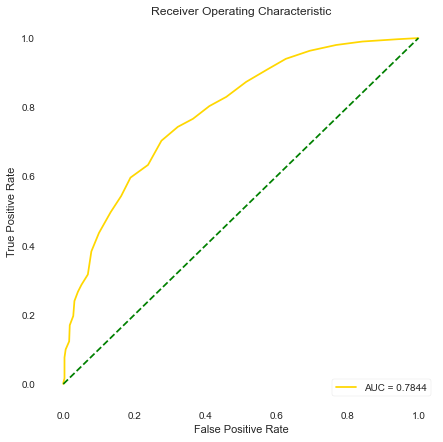

In [282]:
auc_roc=metrics.roc_auc_score(y_test,rf_y_test_pred_proba)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, rf_y_test_pred_proba)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.figure(figsize=(7,7))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='gold',label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--', color = 'green')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [283]:
df_coeffs = pd.DataFrame(zip(selected_features, rf.feature_importances_)).sort_values(by=[1], ascending=False)
df_coeffs.columns = ['feature', 'importance']
df_coeffs

feature  importance
3   feature_3    0.181765
2   feature_2    0.172344
6  feature_13    0.160061
1   feature_1    0.141419
0   feature_0    0.114645
4   feature_5    0.114489
5   feature_6    0.087296
7     group_a    0.018733
8     group_d    0.009247

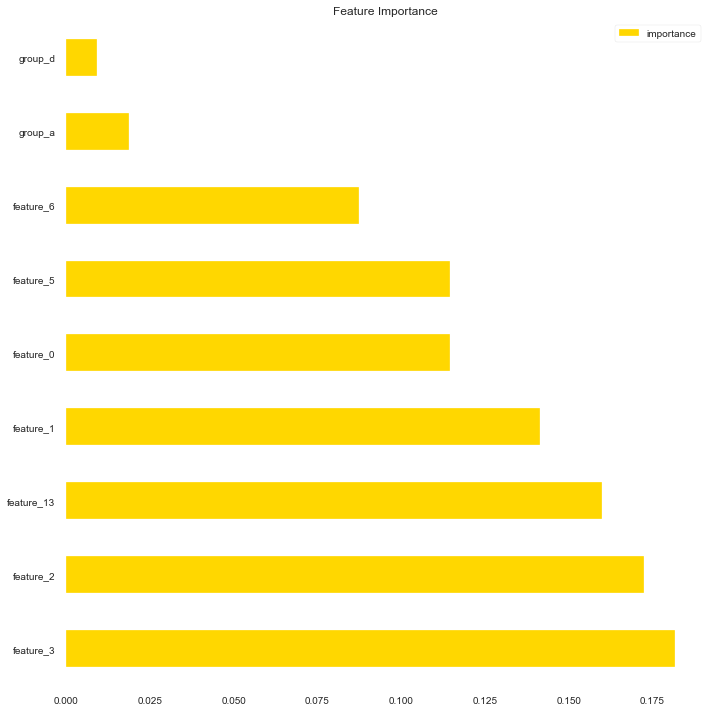

In [284]:
ax = df_coeffs.plot.barh(figsize = (10,10),color = 'gold')
t = np.arange(X.shape[1])
ax.set_yticks(t)
ax.set_yticklabels(df_coeffs['feature'])
plt.title('Feature Importance')
plt.tight_layout()
plt.savefig('rf_feature_score')
plt.show()

In [285]:

def print_results(y_true , predprob):
    print ("AUC Score is:{} ".format(roc_auc_score(y_true, predprob)))

In [287]:
print("Training set scores of Random Forest:")
print_results(y_train, rf_y_train_pred_proba)

Training set scores of linear regression:
AUC Score is:0.9999985421550447 


In [289]:
print("Test set scores of Random Forest :")
print_results(y_test, rf_y_test_pred_proba)

Test set scores of Random Forest :
AUC Score is:0.7843612938596493 


## Model Comparision

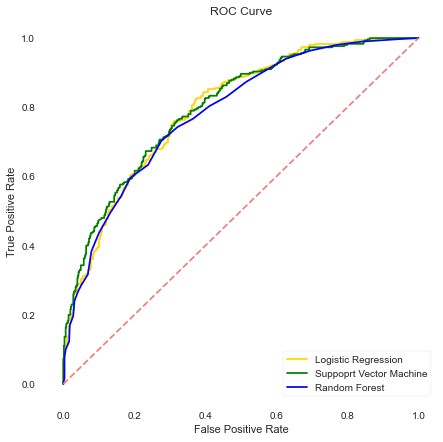

In [291]:
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, lr_y_test_pred_proba)
svc_fpr, svc_tpr, svc_thresholds = roc_curve(y_test, svc_y_test_pred_proba)
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_y_test_pred_proba)

# plot TPR against FPR
plt.figure(figsize=(7,7))
lr_plot = plt.plot(lr_fpr, lr_tpr, color='gold', )
svc_plot = plt.plot(svc_fpr, svc_tpr, color='green')
rf_plot = plt.plot(rf_fpr, rf_tpr, color='blue')
plt.legend(['Logistic Regression', 'Suppoprt Vector Machine','Random Forest'],loc='lower right', )


# plot 45 degree line
xx = np.linspace(0, 1.0, 20)
plt.plot(xx, xx, color='lightcoral', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.savefig('ROC')
plt.show()

- The three models have a similar performance, although SVM seems more robust in the whole curve for the tradeoff between True Positive Rate and False Positive Rate.
- Depending on the threshold that would be applied related the business case, one or other model will be chosen. 
- It should take into consideration times, resources and budget allocated when building this solution

# Real Prediction

- Once the models have been analysed, it is the time to answer the question of this excercise. What are the number of couriers that will be working for the next three weeks knowing it a week before. 

In [520]:
# Getting the original encoded dataset
df_X_real_test = df_enconded_with_courier.copy()
df_y_real_test = df_X_real_test[['churn']]
df_X_real_test.head()

courier  feature_0  week  feature_1  feature_2  feature_3  feature_5  \
0     3767       33.0     2          6         34         38     0.9211   
1     3767       33.0     4         -1         42         37     1.0000   
2     3767       33.0     5         24         41         43     0.9767   
3     3767       33.0     6        -22         65         66     0.9394   
4     6282       35.0     2          9         33         27     0.9259   

   feature_6  feature_7  feature_8  feature_9  feature_10  feature_11  \
0   140.4737     0.1316  2162.4737     0.7632    7.340776           8   
1   135.5946     0.0811  2097.4054     0.9459   11.883784          19   
2   131.0930     0.0233  2043.8837     0.9302    7.072100          16   
3   120.1515     0.0000  2124.2727     0.7727    7.356567          33   
4   100.0000     0.0370  4075.7407     0.8889    8.501233           5   

   feature_12  feature_13  feature_14  feature_15  feature_16  feature_17  \
0   20.208158    5.236316      0.8158   43.384804           1          19   
1   18.855405    5.689459      0.8919   35.078042           3          11   
2   18.925116    5.138605      0.9302   31.455285           1          10   
3   18.259697    4.704394      0.7879   34.252991           1          30   
4   26.863704    4.828519      0.8889   46.478114           1           4   

   churn  group_a  group_b  group_c  group_d  group_e  
0      1        0        1        0        0        0  
1      1        0        1        0        0        0  
2      1        0        1        0        0        0  
3      1        0        1        0        0        0  
4      0        1        0        0        0        0

In [521]:
df_y_real_test.head()

churn
0      1
1      1
2      1
3      1
4      0

In [522]:
# Selecting features for the model
selected_features_with_courier = ['courier','feature_0',
 'feature_1',
 'feature_2',
 'feature_3',
 'feature_5',
 'feature_6',
 'feature_13',
 'group_a',
 'group_d']

In [743]:
df_X_real_test_no_churn = df_X_real_test[selected_features_with_courier]
df_X_real_test_no_churn

courier  feature_0  feature_1  feature_2  feature_3  feature_5  \
0        3767  33.000000          6         34         38     0.9211   
1        3767  33.000000         -1         42         37     1.0000   
2        3767  33.000000         24         41         43     0.9767   
3        3767  33.000000        -22         65         66     0.9394   
4        6282  35.000000          9         33         27     0.9259   
...       ...        ...        ...        ...        ...        ...   
4111   519141  32.971606          6         27         42     0.9048   
4112   519141  32.971606          0         33         39     0.9744   
4113   519141  32.971606        -14         33         45     0.9111   
4114   519141  32.971606        -15         19         19     0.9474   
4115   519141  32.971606          8          4          6     1.0000   

      feature_6  feature_13  group_a  group_d  
0      140.4737    5.236316        0        0  
1      135.5946    5.689459        0        0  
2      131.0930    5.138605        0        0  
3      120.1515    4.704394        0        0  
4      100.0000    4.828519        1        0  
...         ...         ...      ...      ...  
4111   101.4286    7.395952        0        0  
4112   100.0000    7.709487        0        0  
4113   107.1111    8.436222        0        0  
4114   101.0526    8.205263        0        0  
4115   163.5000    8.793333        0        0  

[3025 rows x 10 columns]

In [744]:
df_X_real_ready = df_X_real_test_no_churn.copy()

feature_0  feature_1  feature_2  feature_3  feature_5  feature_6  \
0     33.000000          6         34         38     0.9211   140.4737   
1     33.000000         -1         42         37     1.0000   135.5946   
2     33.000000         24         41         43     0.9767   131.0930   
3     33.000000        -22         65         66     0.9394   120.1515   
4     35.000000          9         33         27     0.9259   100.0000   
...         ...        ...        ...        ...        ...        ...   
4111  32.971606          6         27         42     0.9048   101.4286   
4112  32.971606          0         33         39     0.9744   100.0000   
4113  32.971606        -14         33         45     0.9111   107.1111   
4114  32.971606        -15         19         19     0.9474   101.0526   
4115  32.971606          8          4          6     1.0000   163.5000   

      feature_13  group_a  group_d  
0       5.236316        0        0  
1       5.689459        0        0  
2       5.138605        0        0  
3       4.704394        0        0  
4       4.828519        1        0  
...          ...      ...      ...  
4111    7.395952        0        0  
4112    7.709487        0        0  
4113    8.436222        0        0  
4114    8.205263        0        0  
4115    8.793333        0        0  

[3025 rows x 9 columns]

In [794]:
# Dropping courier
df_X_real_ready = df_X_real_test_no_churn.drop('courier', axis=1)

In [1048]:
#Training the model
rf_y_real_pred = rf.predict(df_X_real_ready)

In [1049]:
#buidling dataframe with real and predict columns per courier
df_total = df_X_real_ready.copy()
df_total['y_predict'] = rf_y_real_pred
df_total['courier'] = df_X_real_test_no_churn['courier']
df_total['y_real'] = df_y_real_test[['churn']]

In [1050]:
#Obtaining probabilities for each data point
rf_y_real_pred_proba = rf.predict_proba(df_X_real_ready)[:,1]

## Threshold Analysis with RF

- Although SVM perfomed better for the test set, when definining the threshold, RF appears to be more reliable and robust

In [1035]:
# Applying different threshold to the model
clf = [CustomThreshold(rf, threshold) for threshold in np.arange(0.5,0.53,0.005)]
for model in clf:
    print(metrics.confusion_matrix(df_total.y_real, model.predict(df_X_real_ready)))
    

[[ 149 1820]
 [  71  985]]
[[ 702 1267]
 [ 247  809]]
[[ 880 1089]
 [ 360  696]]
[[ 947 1022]
 [ 379  677]]
[[1066  903]
 [ 457  599]]
[[1082  887]
 [ 462  594]]
[[1305  664]
 [ 584  472]]


In [840]:
df_evaluation = df_total.copy()

In [1046]:
# Choosing the final threshold
clf = [CustomThreshold(rf, threshold) for threshold in[0.52]]
for model in clf:
    real_confusion_matrix = metrics.confusion_matrix(df_total.y_real, model.predict(df_X_real_ready))
    real_classification_report = (classification_report(df_total.y_real, model.predict(df_X_real_ready)))
    print(real_confusion_matrix)
    print ('True Negative: ' + str(real_confusion_matrix[0,0]))
    print ('True Positive: ' + str(real_confusion_matrix[1,1]))
    print ('False Negative: ' + str(real_confusion_matrix[1,0]))
    print ('False Positive: ' + str(real_confusion_matrix[0,1]))
    print ('Total Number of Values: ' + str(confusion_matrix.sum()))
    print(real_classification_report)
    df_evaluation['y_predict'] = model.predict(df_X_real_ready)

[[1066  903]
 [ 457  599]]
True Negative: 1066
True Positive: 599
False Negative: 457
False Positive: 903
Total Number of Values: 3025
              precision    recall  f1-score   support

           0       0.70      0.54      0.61      1969
           1       0.40      0.57      0.47      1056

    accuracy                           0.55      3025
   macro avg       0.55      0.55      0.54      3025
weighted avg       0.59      0.55      0.56      3025



- The threshold has been placed to reduced the number of False Negative since they are the ones that affect the most the business. At the same time, the True Negative and True Positive ones have been maximize. The False Positive has been considered as not so damaging since more courier will be available.

In [1025]:
# Total number of unique couriers
df_evaluation.courier.nunique()

729

In [1051]:
#Obtaining the values of y_predict for the same courier
df_evaluation.groupby(['courier','y_predict']).size()

courier  y_predict
3767     0            3
         1            1
6282     0            3
         1            3
10622    0            1
                     ..
519307   1            3
519324   0            2
         1            2
519341   0            1
         1            2
Length: 1227, dtype: int64

- Depending on the features of each courier, it is classfied as churned or not churned. The proposed solution considers that if a courier is classified as 0, not churned it will be reported as working courier.

In [1023]:
df_total_working_predicted_couriers = df_evaluation[df_evaluation.y_predict == 0]
df_total_working_predicted_couriers.courier.nunique()

452

- **The model predicts that 452 couriers will be working during the churn window**

# Conclusions

- In order to improve accuracy and roc-auc performance, the follwing techniques have been applied:
    - Filling NAN for feature_0 and group
    - Analysing correlations between features, dropping feature_4
    - Encoding group column, the unique categorical variable
    - Applying normalization and run the model
    - Applying standarisation and run the model outperforming normalization
    - Changing distribution of data to avoid skeweness and getting the most normal distribution possible for every feature
    - Spliting dataset and cross validation to avoid overfitting
    - Run different models to compete and selecting SVM as the most performative one
    - Analysing different  thresholds to tune the results

# Next Steps

- Create synthetic columns that are made of the combination of other columns that will add value. For example, total number of weeks that each courier has worked
- Working on features to have more realistic distribution of every feature
- Trying to get a more balanced classes by using Synthetic Minority Oversampling Technique (SMOTE)
- Trying other models a bit more complex as Xgboost or Neural Network
- Create synthetic data 
